In [138]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.font_manager as fm

In [139]:
df = pd.read_csv("C:/Users/keats/OneDrive/바탕 화면/total_sales.csv")
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,쿠폰코드,할인율,할인금액,매출,수익,총 매출
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,ELEC10,10.0,15.371,153.71,138.339,160.21
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,ELEC10,10.0,15.371,153.71,138.339,160.21
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,OFF10,10.0,0.205,2.05,1.845,8.55
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,SALE10,10.0,0.000,87.65,87.650,94.15
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,0.0,Used,남,Chicago,12,AIO10,10.0,1.650,16.50,14.850,16.50


In [140]:
df.describe()

,수량,평균금액,배송료,가입기간,할인율,할인금액,매출,수익,총 매출
count,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000
mean,4.497638,52.237646,4.166770,26.127995,19.802358,5.872052,88.254754,82.382703,92.421524
std,20.104711,64.006882,10.499075,13.478285,8.278878,21.266244,163.993178,154.315592,165.845843
min,1.000000,0.390000,0.000000,2.000000,0.000000,0.000000,0.400000,0.287000,0.400000
25%,1.000000,5.700000,0.000000,15.000000,10.000000,0.000000,11.960000,10.872000,13.590000
50%,1.000000,16.990000,0.000000,27.000000,20.000000,0.000000,30.390000,28.144000,34.000000
75%,2.000000,102.130000,6.000000,37.000000,30.000000,1.902000,121.300000,119.000000,127.800000
max,900.000000,355.740000,521.360000,50.000000,30.000000,2102.478000,10512.390000,8545.500000,10512.390000


In [141]:
df['고객ID'].nunique()

1468

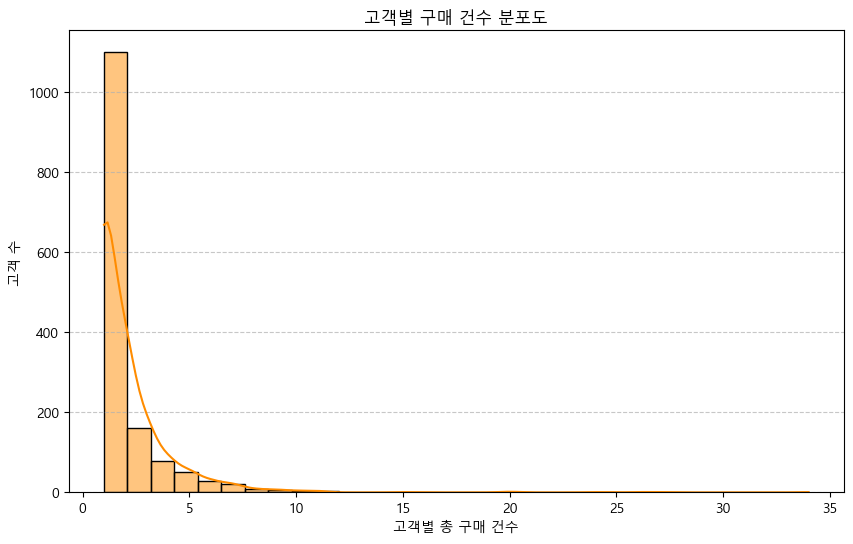

In [164]:
# 거래 날짜를 datetime 형식으로 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 같은 고객의 같은 날 거래를 1건으로 간주
unique_orders = df.groupby(['고객ID', '거래날짜'])['거래ID'].nunique().reset_index()

# 고객별 총 구매 건수 계산
customer_purchase_counts = unique_orders.groupby('고객ID')['거래ID'].count().reset_index()
customer_purchase_counts.rename(columns={'거래ID': '구매건수'}, inplace=True)

# 히스토그램(분포도) 시각화
plt.figure(figsize=(10, 6))
sns.histplot(customer_purchase_counts['구매건수'], bins=30, kde=True, color='darkorange')
plt.xlabel("고객별 총 구매 건수")
plt.ylabel("고객 수")
plt.title("고객별 구매 건수 분포도")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



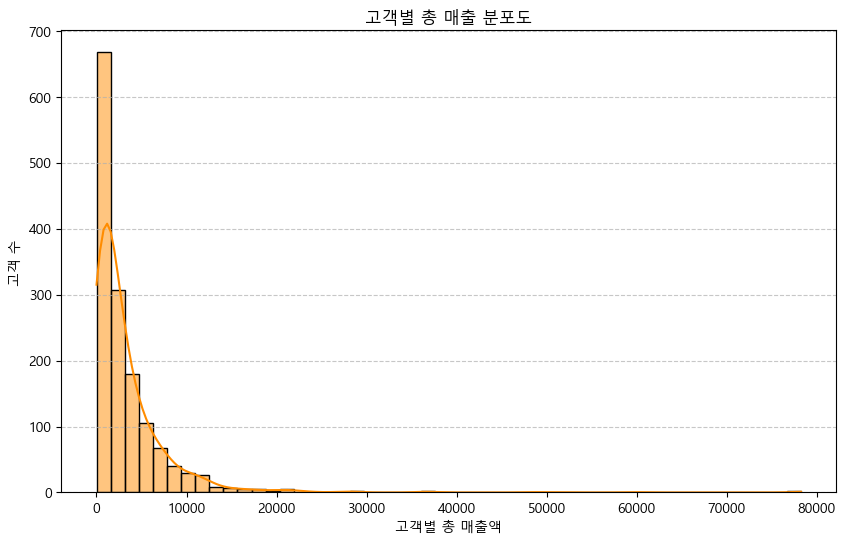

In [159]:

# 거래 날짜를 datetime 형식으로 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 같은 고객의 같은 날 거래를 1건으로 간주하여 총 매출 계산
unique_sales = df.groupby(['고객ID', '거래날짜'])['총 매출'].sum().reset_index()

# 고객별 총 매출 계산
customer_total_sales = unique_sales.groupby('고객ID')['총 매출'].sum().reset_index()

# 히스토그램(분포도) 시각화
plt.figure(figsize=(10, 6))
sns.histplot(customer_total_sales['총 매출'], bins=50, kde=True, color='darkorange')
plt.xlabel("고객별 총 매출액")
plt.ylabel("고객 수")
plt.title("고객별 총 매출 분포도")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


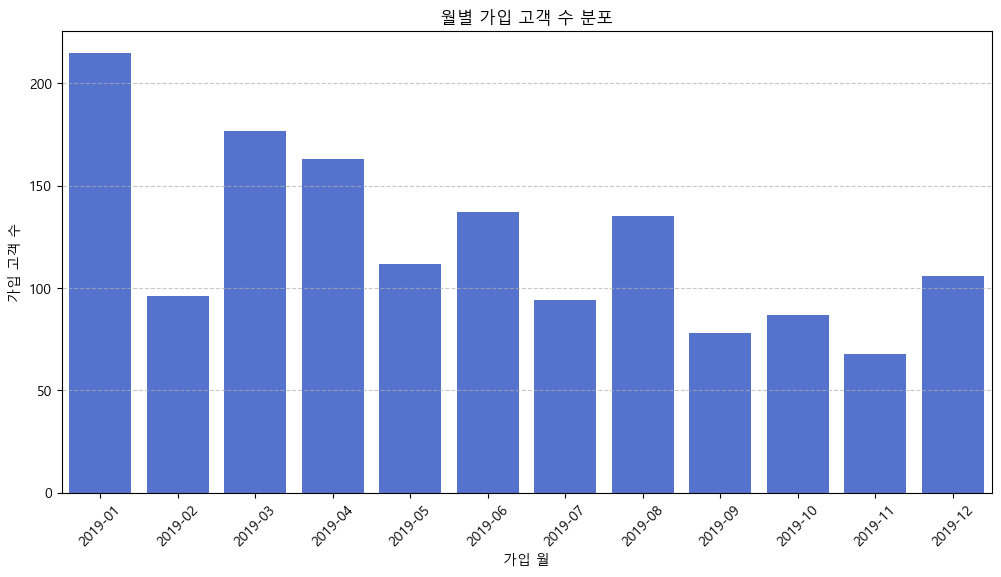

In [170]:
# 거래 날짜를 datetime 형식으로 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 고객별 첫 거래일 찾기
first_purchase = df.groupby('고객ID')['거래날짜'].min().reset_index()
first_purchase.rename(columns={'거래날짜': '첫 거래일'}, inplace=True)

# 첫 거래가 발생한 월 기준으로 그룹화
first_purchase['가입월'] = first_purchase['첫 거래일'].dt.to_period('M')  # 월 단위 변환

# 월별 가입 고객 수 집계
monthly_signups = first_purchase.groupby('가입월')['고객ID'].count().reset_index()
monthly_signups.rename(columns={'고객ID': '가입 고객 수'}, inplace=True)

# 히스토그램 대신 막대 그래프 사용 (월별 데이터이므로)
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_signups, x=monthly_signups['가입월'].astype(str), y='가입 고객 수', color='royalblue')
plt.xlabel("가입 월")
plt.ylabel("가입 고객 수")
plt.title("월별 가입 고객 수 분포")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



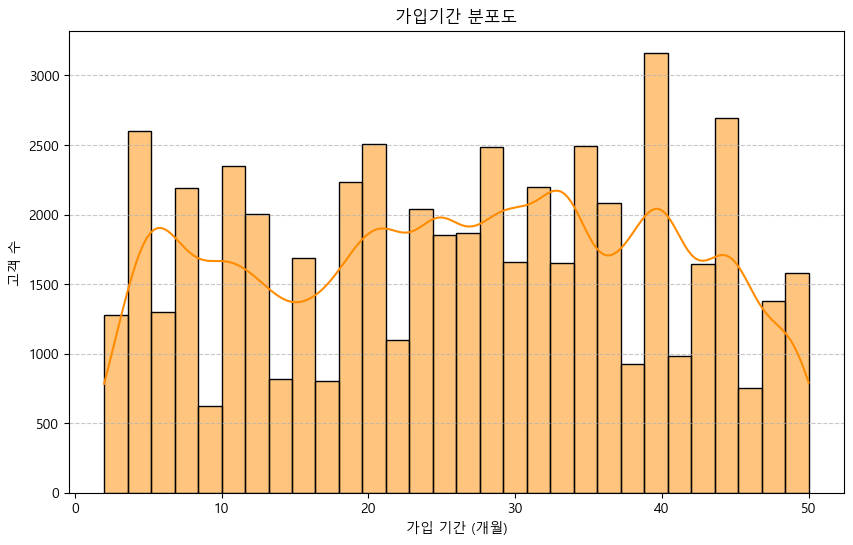

In [169]:
# 가입기간(개월) 컬럼이 존재하는지 확인 후 분포도 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df['가입기간'], bins=30, kde=True, color='darkorange')
plt.xlabel("가입 기간 (개월)")
plt.ylabel("고객 수")
plt.title("가입기간 분포도")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

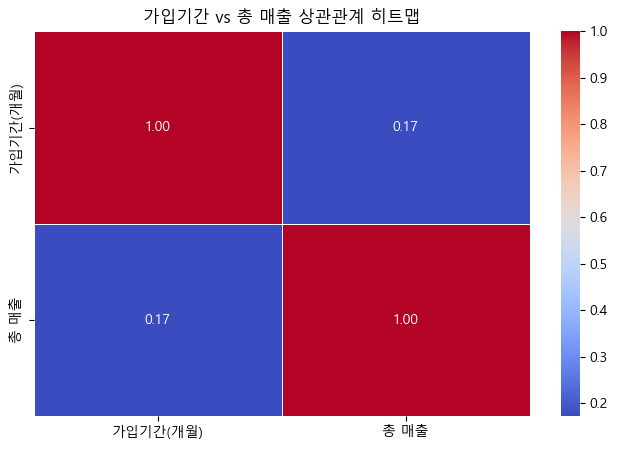

In [172]:

# 거래 날짜를 datetime 형식으로 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 고객별 첫 거래일 찾기
first_purchase = df.groupby('고객ID')['거래날짜'].min().reset_index()
first_purchase.rename(columns={'거래날짜': '첫 거래일'}, inplace=True)

# 최신 거래일을 기준으로 가입기간(개월) 계산
latest_date = df['거래날짜'].max()
first_purchase['가입기간(개월)'] = ((latest_date - first_purchase['첫 거래일']).dt.days) // 30  # 일수를 개월로 변환

# 고객별 총 매출(중복 거래 제거: 같은 날짜의 여러 거래ID는 1건으로 간주)
unique_sales = df.groupby(['고객ID', '거래날짜'])['총 매출'].sum().reset_index()

# 고객별 총 매출 집계
customer_total_sales = unique_sales.groupby('고객ID')['총 매출'].sum().reset_index()

# 가입기간과 총 매출 데이터 병합
df_corr = first_purchase.merge(customer_total_sales, on='고객ID', how='left')

# 상관행렬 계산
corr_matrix = df_corr[['가입기간(개월)', '총 매출']].corr()

# 히트맵 시각화
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("가입기간 vs 총 매출 상관관계 히트맵")
plt.show()



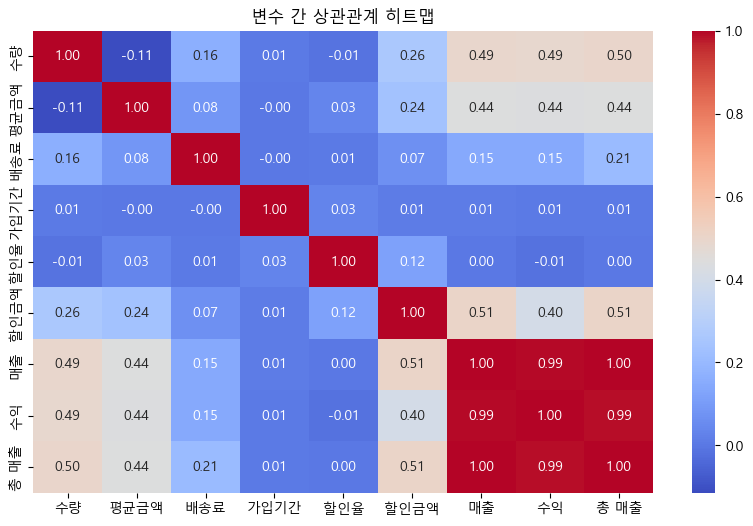

In [142]:
df_numeric = df.select_dtypes(include=['number'])  # 숫자형 데이터만 선택
corr_matrix = df_numeric.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("변수 간 상관관계 히트맵")
plt.show()

In [143]:
from scipy.stats import skew, kurtosis
print("왜도:", skew(df['총 매출']))
print("첨도:", kurtosis(df['총 매출']))

왜도: 18.181324918450283
첨도: 763.2549196230262


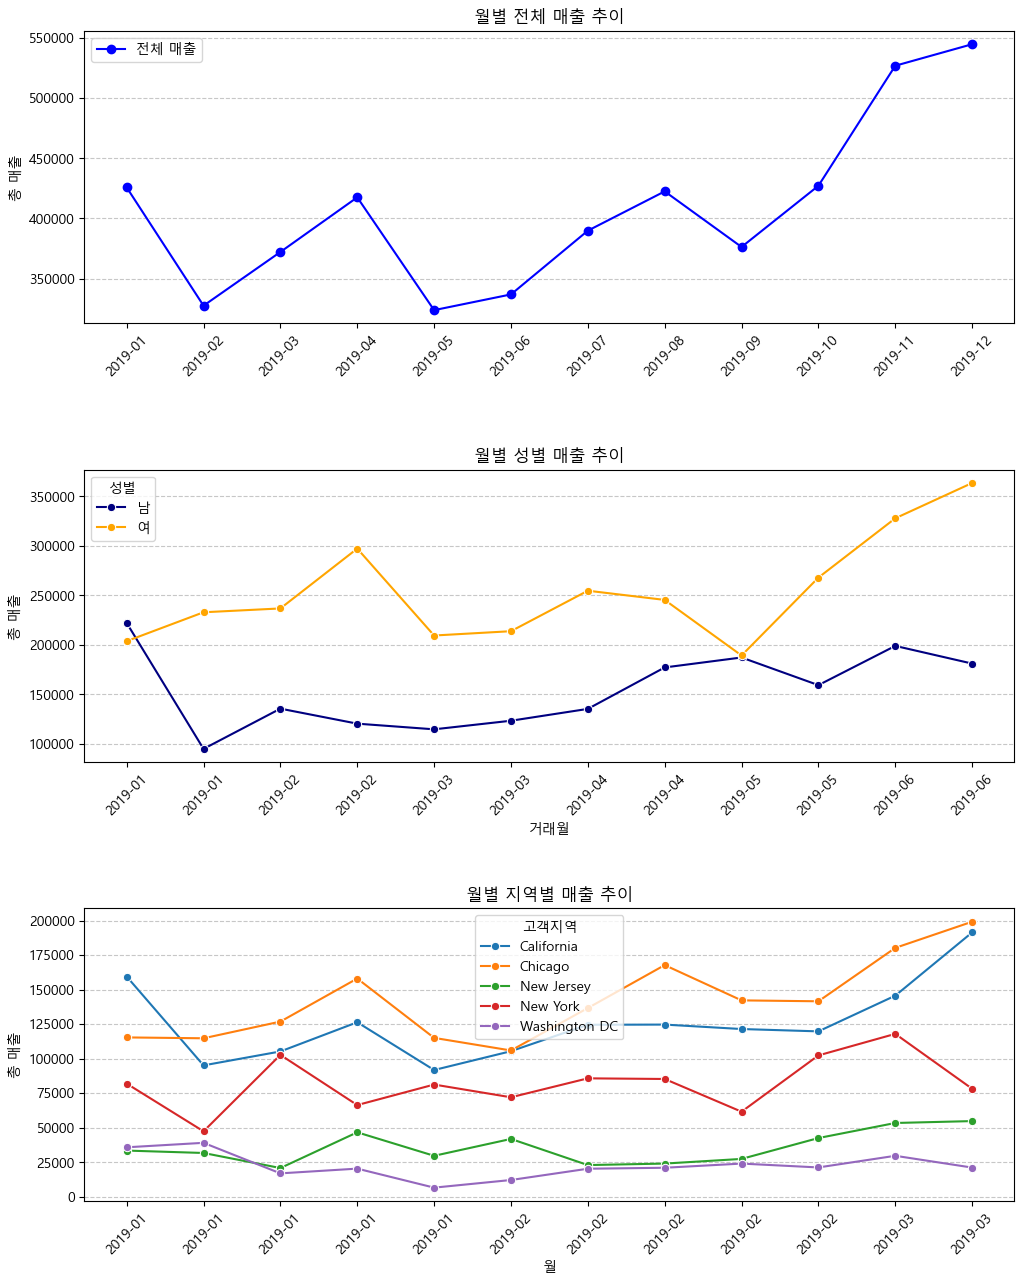

In [144]:
plt.rc('font', family='Malgun Gothic')
# 날짜 형식 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 월별 매출 계산
df['거래월'] = df['거래날짜'].dt.to_period('M')

# 전체 매출 추이
monthly_sales = df.groupby('거래월')['총 매출'].sum().reset_index()
monthly_sales['거래월'] = monthly_sales['거래월'].astype(str)

# 성별 매출 추이
gender_sales = df.groupby(['거래월', '성별'])['총 매출'].sum().reset_index()
gender_sales['거래월'] = gender_sales['거래월'].astype(str)

# 지역별 매출 추이
region_sales = df.groupby(['거래월', '고객지역'])['총 매출'].sum().reset_index()
region_sales['거래월'] = region_sales['거래월'].astype(str)

# 그래프 시각화
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=False)  # sharex=False 로 변경

# 전체 매출 추이
axes[0].plot(monthly_sales['거래월'], monthly_sales['총 매출'], marker='o', linestyle='-', color='b', label='전체 매출')
axes[0].set_title("월별 전체 매출 추이")
axes[0].set_ylabel("총 매출")
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_xticklabels(monthly_sales['거래월'], rotation=45)  # x축 눈금 회전

# 성별 매출 추이
sns.lineplot(data=gender_sales, x='거래월', y='총 매출', hue='성별', marker='o', ax=axes[1], palette={'남':'navy', '여':'orange'})
axes[1].set_title("월별 성별 매출 추이")
axes[1].set_ylabel("총 매출")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_xticklabels(gender_sales['거래월'], rotation=45)  # x축 눈금 회전

# 지역별 매출 추이
sns.lineplot(data=region_sales, x='거래월', y='총 매출', hue='고객지역', marker='o', ax=axes[2])
axes[2].set_title("월별 지역별 매출 추이")
axes[2].set_xlabel("월")
axes[2].set_ylabel("총 매출")
axes[2].grid(axis='y', linestyle='--', alpha=0.7)
axes[2].set_xticklabels(region_sales['거래월'], rotation=45)  # x축 눈금 회전

# 서브플롯 간격 조정
plt.subplots_adjust(hspace=0.5, bottom=0.1)

# 그래프 출력
plt.show()



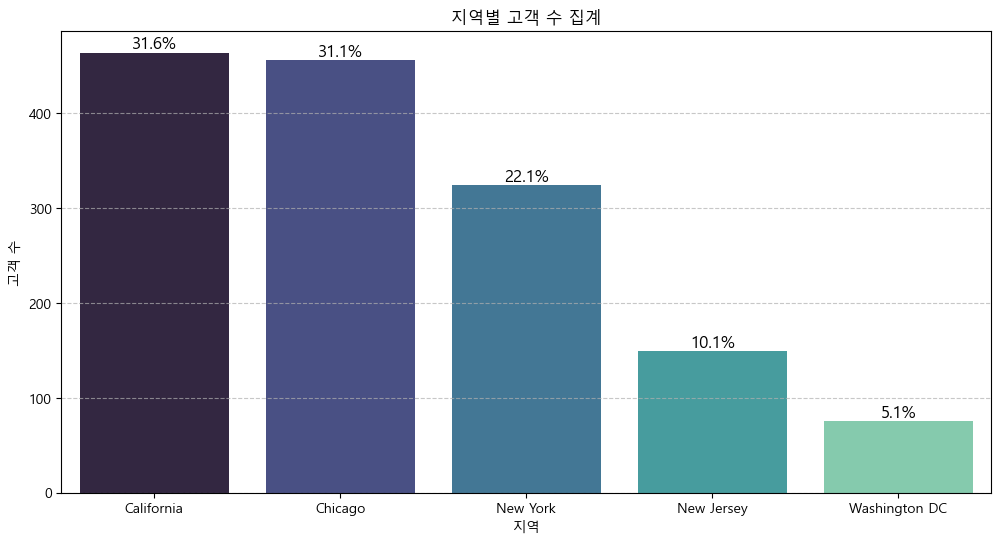

In [145]:

# 날짜 형식 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 지역별 고객 수 계산
region_customer_count = df.groupby('고객지역')['고객ID'].nunique().reset_index()
region_customer_count.rename(columns={'고객ID': '고객 수'}, inplace=True)

# 전체 고객 수 계산
total_customers = region_customer_count['고객 수'].sum()

# 지역별 고객 비율 계산
region_customer_count['고객 비율(%)'] = (region_customer_count['고객 수'] / total_customers) * 100

# 내림차순 정렬
region_customer_count = region_customer_count.sort_values(by='고객 수', ascending=False)

# 시각화
fig, ax = plt.subplots(figsize=(12, 6))

# 막대 그래프 (오렌지 계열 적용, 내림차순 정렬)
bars = sns.barplot(data=region_customer_count, x='고객지역', y='고객 수', palette='mako', ax=ax)

# 각 막대 위에 고객 비율 표시
for bar, percentage in zip(bars.patches, region_customer_count['고객 비율(%)']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{percentage:.1f}%', 
            ha='center', va='bottom', fontsize=12, color='black')

# 그래프 스타일 설정
ax.set_ylabel("고객 수")
ax.set_xlabel("지역")
ax.set_title("지역별 고객 수 집계")
ax.set_xticklabels(region_customer_count['고객지역'], rotation=0, ha='center')

# 그래프 출력
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



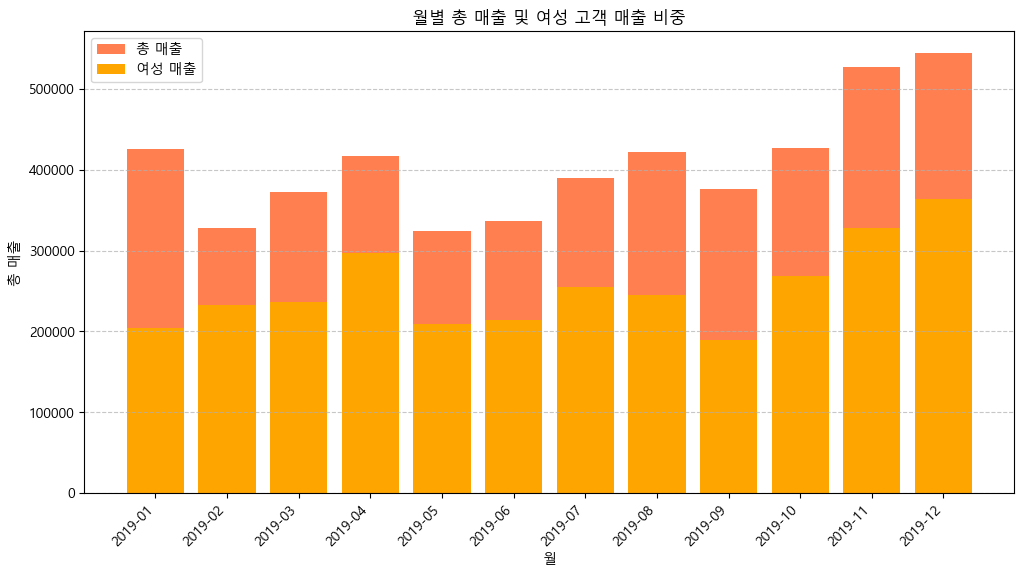

In [146]:
# 날짜 형식 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 월별 총 매출 계산
df['거래월'] = df['거래날짜'].dt.to_period('M')

# 전체 매출 집계
monthly_sales = df.groupby('거래월')['총 매출'].sum().reset_index()

# 여성 고객 매출 집계
female_sales = df[df['성별'] == '여'].groupby('거래월')['총 매출'].sum().reset_index()

# 데이터 병합
monthly_sales = monthly_sales.merge(female_sales, on='거래월', how='left', suffixes=('', '_여성'))
monthly_sales['총 매출_여성'].fillna(0, inplace=True)

# 여성 고객 매출 비율 계산
monthly_sales['여성 매출 비율'] = monthly_sales['총 매출_여성'] / monthly_sales['총 매출']

# 시각화
fig, ax = plt.subplots(figsize=(12, 6))

# 총 매출 막대 그래프
bars = ax.bar(monthly_sales['거래월'].astype(str), monthly_sales['총 매출'], color='coral', label="총 매출")

# 여성 매출 비율 막대 그래프 (총 매출 대비 비율)
ax.bar(monthly_sales['거래월'].astype(str), monthly_sales['총 매출_여성'], color='orange', label="여성 매출")

# 그래프 스타일 설정
ax.set_ylabel("총 매출")
ax.set_xlabel("월")
ax.set_title("월별 총 매출 및 여성 고객 매출 비중")
ax.set_xticklabels(monthly_sales['거래월'].astype(str), rotation=45, ha='right')

# 범례 추가
ax.legend()

# 그래프 출력
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


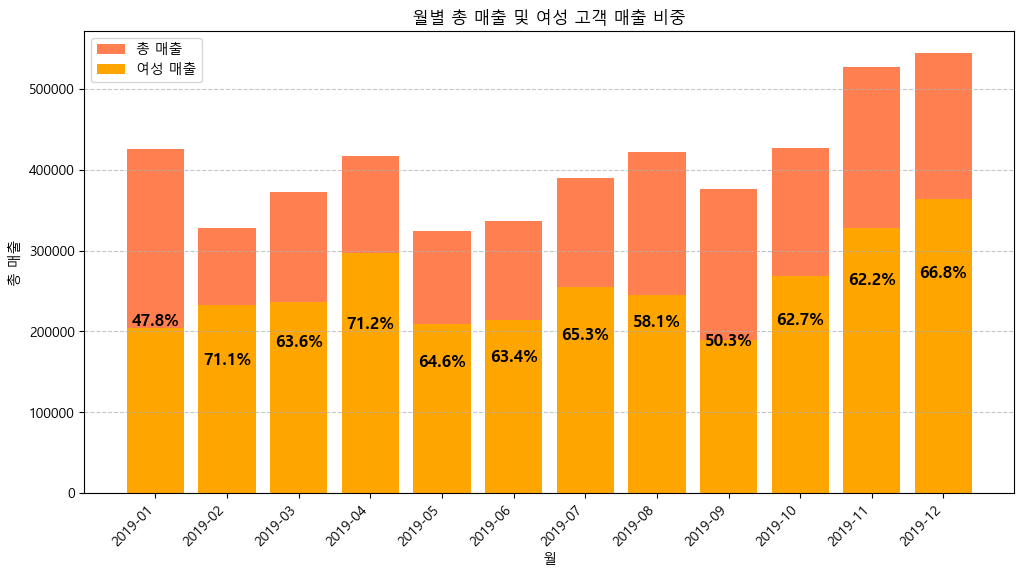

In [147]:
# 날짜 형식 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 월별 총 매출 계산
df['거래월'] = df['거래날짜'].dt.to_period('M')

# 전체 매출 집계
monthly_sales = df.groupby('거래월')['총 매출'].sum().reset_index()

# 여성 고객 매출 집계
female_sales = df[df['성별'] == '여'].groupby('거래월')['총 매출'].sum().reset_index()

# 데이터 병합
monthly_sales = monthly_sales.merge(female_sales, on='거래월', how='left', suffixes=('', '_여성'))
monthly_sales['총 매출_여성'].fillna(0, inplace=True)

# 여성 고객 매출 비율 계산
monthly_sales['여성 매출 비율(%)'] = (monthly_sales['총 매출_여성'] / monthly_sales['총 매출']) * 100

# 시각화
fig, ax = plt.subplots(figsize=(12, 6))

# 총 매출 막대 그래프
bars = ax.bar(monthly_sales['거래월'].astype(str), monthly_sales['총 매출'], color='coral', label="총 매출")

# 여성 매출 막대 그래프 (총 매출 대비 비율)
ax.bar(monthly_sales['거래월'].astype(str), monthly_sales['총 매출_여성'], color='orange', label="여성 매출")

# 여성 매출 비율 수치 표시
for bar, percentage in zip(bars, monthly_sales['여성 매출 비율(%)']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height * 0.5, f'{percentage:.1f}%', 
            ha='center', va='center', fontsize=12, color='black', fontweight='bold')

# 그래프 스타일 설정
ax.set_ylabel("총 매출")
ax.set_xlabel("월")
ax.set_title("월별 총 매출 및 여성 고객 매출 비중")
ax.set_xticklabels(monthly_sales['거래월'].astype(str), rotation=45, ha='right')

# 범례 추가
ax.legend()

# 그래프 출력
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

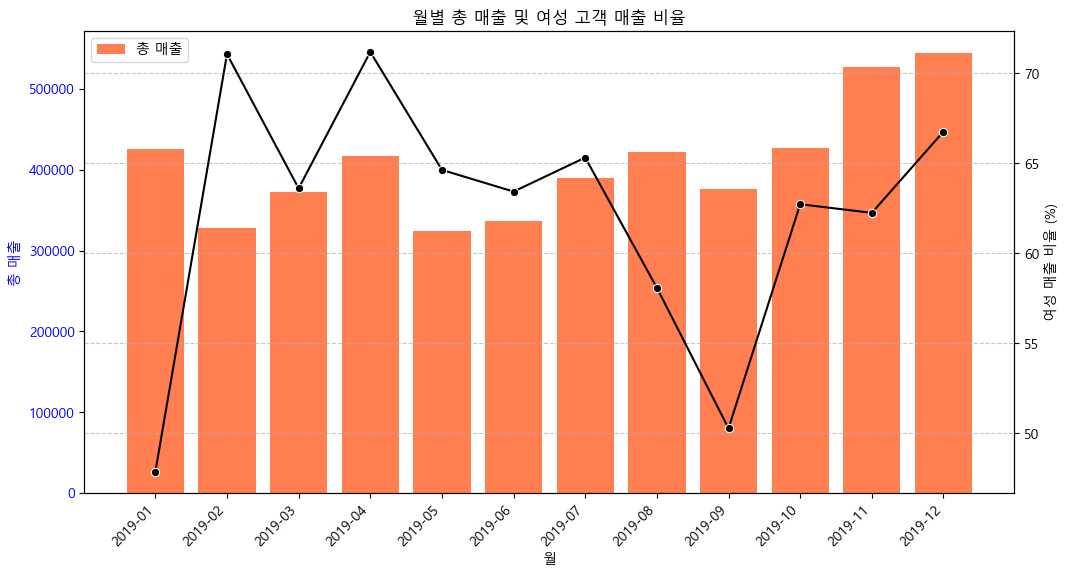

In [148]:
# 날짜 형식 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 월별 총 매출 계산
df['거래월'] = df['거래날짜'].dt.to_period('M')

# 전체 매출 집계
monthly_sales = df.groupby('거래월')['총 매출'].sum().reset_index()

# 여성 고객 매출 집계
female_sales = df[df['성별'] == '여'].groupby('거래월')['총 매출'].sum().reset_index()

# 데이터 병합
monthly_sales = monthly_sales.merge(female_sales, on='거래월', how='left', suffixes=('', '_여성'))
monthly_sales['총 매출_여성'].fillna(0, inplace=True)

# 여성 고객 매출 비율 계산
monthly_sales['여성 매출 비율(%)'] = (monthly_sales['총 매출_여성'] / monthly_sales['총 매출']) * 100

# 데이터 타입 변환 (오류 해결)
monthly_sales['거래월'] = monthly_sales['거래월'].astype(str)  # Period → 문자열 변환
monthly_sales['여성 매출 비율(%)'] = monthly_sales['여성 매출 비율(%)'].astype(float)  # 숫자로 변환

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 총 매출 막대 그래프
bars = ax1.bar(monthly_sales['거래월'].astype(str), monthly_sales['총 매출'], color='coral', label="총 매출")
ax1.set_ylabel("총 매출", color='b')
ax1.set_xlabel("월")
ax1.set_title("월별 총 매출 및 여성 고객 매출 비율")
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(monthly_sales['거래월'].astype(str), rotation=45, ha='right')

# 여성 매출 비율 보조선 그래프 추가
ax2 = ax1.twinx()
sns.lineplot(data=monthly_sales, x='거래월', y='여성 매출 비율(%)', color='black', marker='o', ax=ax2)
ax2.set_ylabel("여성 매출 비율 (%)", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# 범례 추가
ax1.legend(loc='upper left')

# 그래프 출력
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

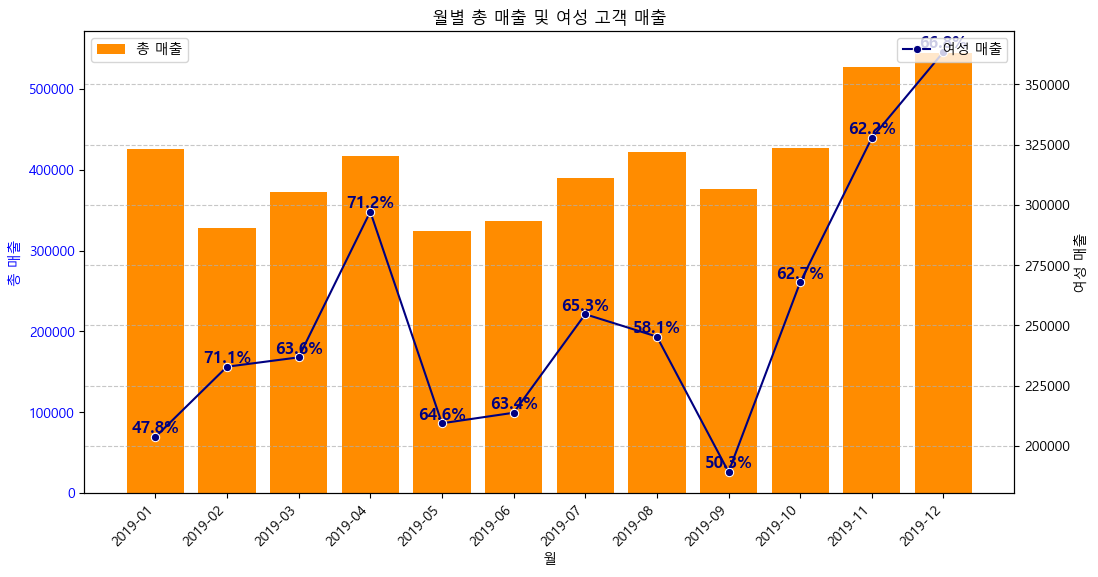

In [149]:

# 날짜 형식 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 월별 총 매출 계산
df['거래월'] = df['거래날짜'].dt.to_period('M')

# 전체 매출 집계
monthly_sales = df.groupby('거래월')['총 매출'].sum().reset_index()

# 여성 고객 매출 집계
female_sales = df[df['성별'] == '여'].groupby('거래월')['총 매출'].sum().reset_index()

# 데이터 병합
monthly_sales = monthly_sales.merge(female_sales, on='거래월', how='left', suffixes=('', '_여성'))
monthly_sales['총 매출_여성'].fillna(0, inplace=True)

# 여성 고객 매출 비율 계산
monthly_sales['여성 매출 비율(%)'] = (monthly_sales['총 매출_여성'] / monthly_sales['총 매출']) * 100

# 데이터 타입 변환 (오류 방지)
monthly_sales['거래월'] = monthly_sales['거래월'].astype(str)  # Period → 문자열 변환
monthly_sales['여성 매출 비율(%)'] = monthly_sales['여성 매출 비율(%)'].astype(float)  # 숫자로 변환

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 총 매출 막대 그래프
bars = ax1.bar(monthly_sales['거래월'], monthly_sales['총 매출'], color='darkorange', label="총 매출")
ax1.set_ylabel("총 매출", color='b')
ax1.set_xlabel("월")
ax1.set_title("월별 총 매출 및 여성 고객 매출")
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(monthly_sales['거래월'], rotation=45, ha='right')

# 여성 매출 보조선 그래프 (총 매출과 동일한 축 사용)
ax2 = ax1.twinx()
sns.lineplot(data=monthly_sales, x='거래월', y='총 매출_여성', color='navy', marker='o', ax=ax2, label="여성 매출")
ax2.set_ylabel("여성 매출", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# 여성 매출 비율을 선 그래프 위에 표시
for i, txt in enumerate(monthly_sales['여성 매출 비율(%)']):
    ax2.text(i, monthly_sales['총 매출_여성'].iloc[i], f'{txt:.1f}%', 
             ha='center', va='bottom', fontsize=12, color='navy', fontweight='bold')

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 출력
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


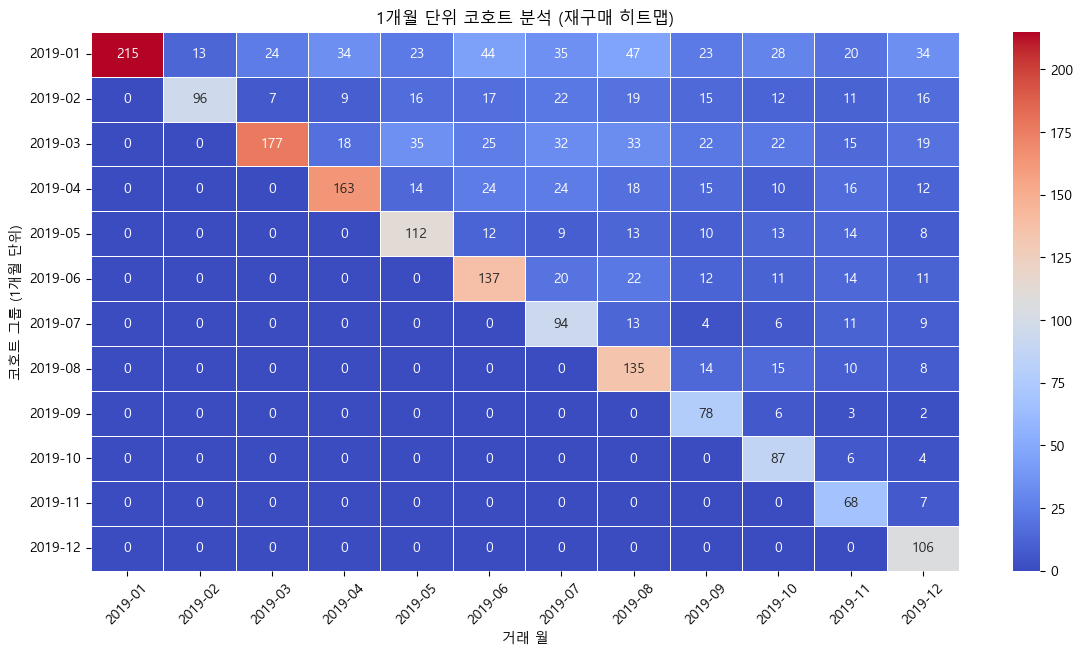

In [203]:

# 날짜 형식 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 고객별 첫 구매 날짜 계산
first_purchase = df.groupby('고객ID')['거래날짜'].min().reset_index()
first_purchase.rename(columns={'거래날짜': '첫 구매날짜'}, inplace=True)

# 고객 데이터 병합
df = df.merge(first_purchase, on='고객ID', how='left')

# 1개월 단위 코호트 그룹 생성 (최초 구매 기준)
df['코호트 그룹'] = df['첫 구매날짜'].dt.to_period('M').astype(str)

# 거래 월 계산 (재구매가 발생한 시점)
df['거래월'] = df['거래날짜'].dt.to_period('M')

# 코호트별 고객 수 집계
cohort_data = df.groupby(['코호트 그룹', '거래월'])['고객ID'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='코호트 그룹', columns='거래월', values='고객ID').fillna(0)

# 히트맵 시각화
plt.figure(figsize=(14, 7))
sns.heatmap(cohort_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("1개월 단위 코호트 분석 (재구매 히트맵)")
plt.xlabel("거래 월")
plt.ylabel("코호트 그룹 (1개월 단위)")
plt.xticks(rotation=45)
plt.show()



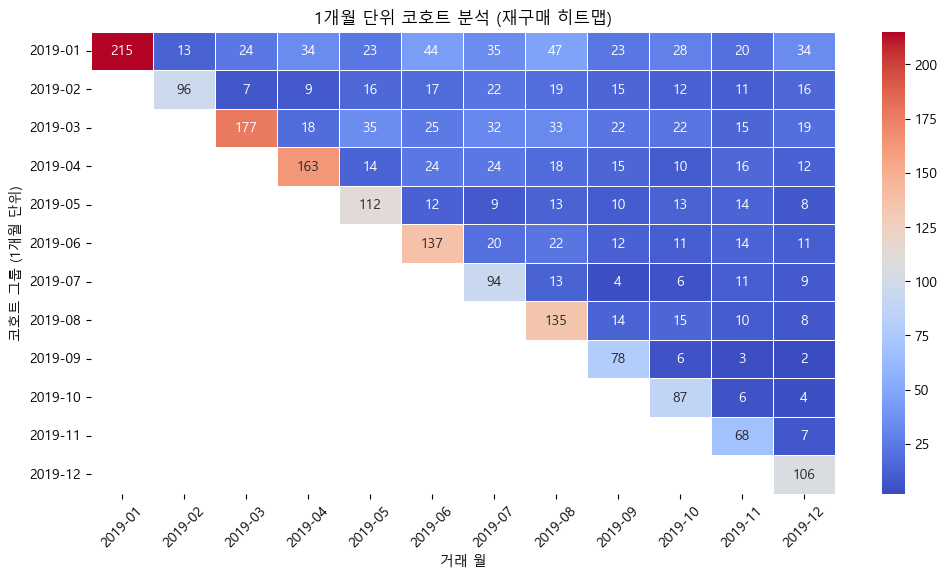

In [206]:

# 날짜 형식 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 고객별 첫 구매 날짜 계산
first_purchase = df.groupby('고객ID')['거래날짜'].min().reset_index()
first_purchase.rename(columns={'거래날짜': '첫 구매날짜'}, inplace=True)

# 고객 데이터 병합 (suffixes 사용)
df = df.merge(first_purchase, on='고객ID', how='left', suffixes=('', '_new'))

# 중복된 '첫 구매날짜' 컬럼 삭제
df.drop(columns=['첫 구매날짜_new'], inplace=True)

# 1개월 단위 코호트 그룹 생성 (최초 구매 기준)
df['코호트 그룹'] = df['첫 구매날짜'].dt.to_period('M')

# 거래 월 계산 (재구매가 발생한 시점)
df['거래월'] = df['거래날짜'].dt.to_period('M')

# 코호트별 고객 수 집계
cohort_data = df.groupby(['코호트 그룹', '거래월'])['고객ID'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='코호트 그룹', columns='거래월', values='고객ID')

# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("1개월 단위 코호트 분석 (재구매 히트맵)")
plt.xlabel("거래 월")
plt.ylabel("코호트 그룹 (1개월 단위)")
plt.xticks(rotation=45)
plt.show()



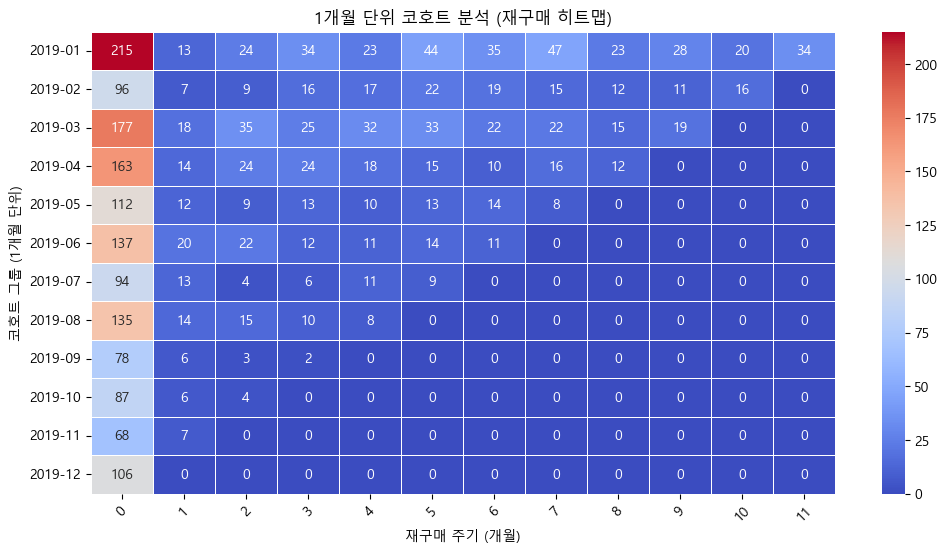

In [207]:
# 날짜 형식 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 고객별 첫 구매 날짜 계산
first_purchase = df.groupby('고객ID')['거래날짜'].min().reset_index()
first_purchase.rename(columns={'거래날짜': '첫 구매날짜'}, inplace=True)

# 고객 데이터 병합 (suffixes 사용)
df = df.merge(first_purchase, on='고객ID', how='left', suffixes=('', '_new'))

# 중복된 '첫 구매날짜' 컬럼 삭제
df.drop(columns=['첫 구매날짜_new'], inplace=True)

# 코호트 그룹 생성 (최초 구매 기준, 월 단위)
df['코호트 그룹'] = df['첫 구매날짜'].dt.to_period('M')

# 재구매 월 수 계산
df['재구매 주기'] = (df['거래날짜'].dt.to_period('M') - df['첫 구매날짜'].dt.to_period('M')).apply(lambda x: x.n)

# 코호트별 고객 수 집계
cohort_data = df.groupby(['코호트 그룹', '재구매 주기'])['고객ID'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='코호트 그룹', columns='재구매 주기', values='고객ID').fillna(0)

# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("1개월 단위 코호트 분석 (재구매 히트맵)")
plt.xlabel("재구매 주기 (개월)")
plt.ylabel("코호트 그룹 (1개월 단위)")
plt.xticks(rotation=45)
plt.show()

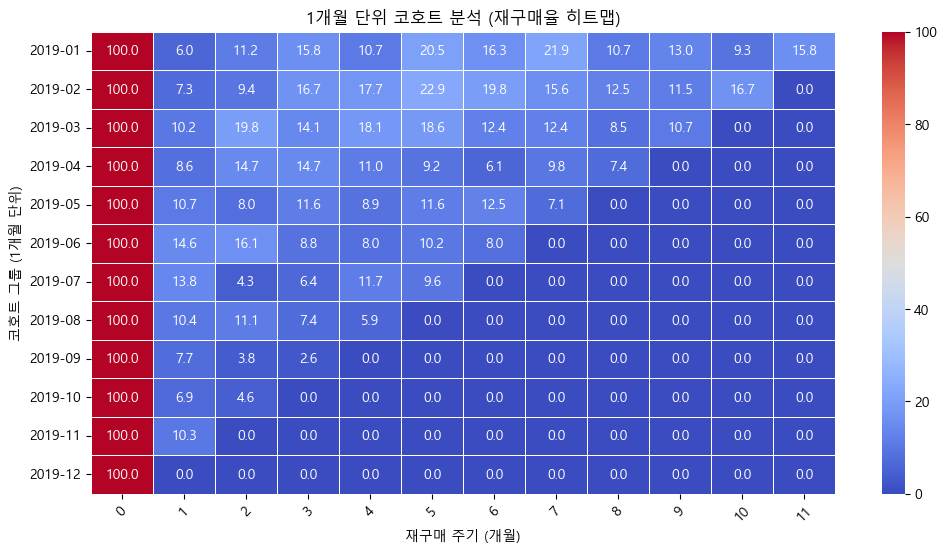

In [208]:
# 날짜 형식 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 고객별 첫 구매 날짜 계산
first_purchase = df.groupby('고객ID')['거래날짜'].min().reset_index()
first_purchase.rename(columns={'거래날짜': '첫 구매날짜'}, inplace=True)

# 고객 데이터 병합
df = df.merge(first_purchase, on='고객ID', how='left', suffixes=('', '_new'))
df.drop(columns=['첫 구매날짜_new'], inplace=True)  # 중복 컬럼 제거

# 코호트 그룹 생성 (최초 구매 기준, 월 단위)
df['코호트 그룹'] = df['첫 구매날짜'].dt.to_period('M')

# 재구매 월 수 계산
df['재구매 주기'] = (df['거래날짜'].dt.to_period('M') - df['첫 구매날짜'].dt.to_period('M')).apply(lambda x: x.n)

# 코호트별 고객 수 집계
cohort_data = df.groupby(['코호트 그룹', '재구매 주기'])['고객ID'].nunique().reset_index()

# 최초 구매 고객 수 계산
first_purchase_counts = cohort_data[cohort_data['재구매 주기'] == 0][['코호트 그룹', '고객ID']]
first_purchase_counts.rename(columns={'고객ID': '최초 구매 고객 수'}, inplace=True)

# 재구매율 계산
cohort_data = cohort_data.merge(first_purchase_counts, on='코호트 그룹', how='left')
cohort_data['재구매율'] = (cohort_data['고객ID'] / cohort_data['최초 구매 고객 수']) * 100  # 백분율 변환

# 피벗 테이블 생성 (재구매율 기준)
cohort_pivot = cohort_data.pivot(index='코호트 그룹', columns='재구매 주기', values='재구매율').fillna(0)

# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_pivot, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("1개월 단위 코호트 분석 (재구매율 히트맵)")
plt.xlabel("재구매 주기 (개월)")
plt.ylabel("코호트 그룹 (1개월 단위)")
plt.xticks(rotation=45)
plt.show()

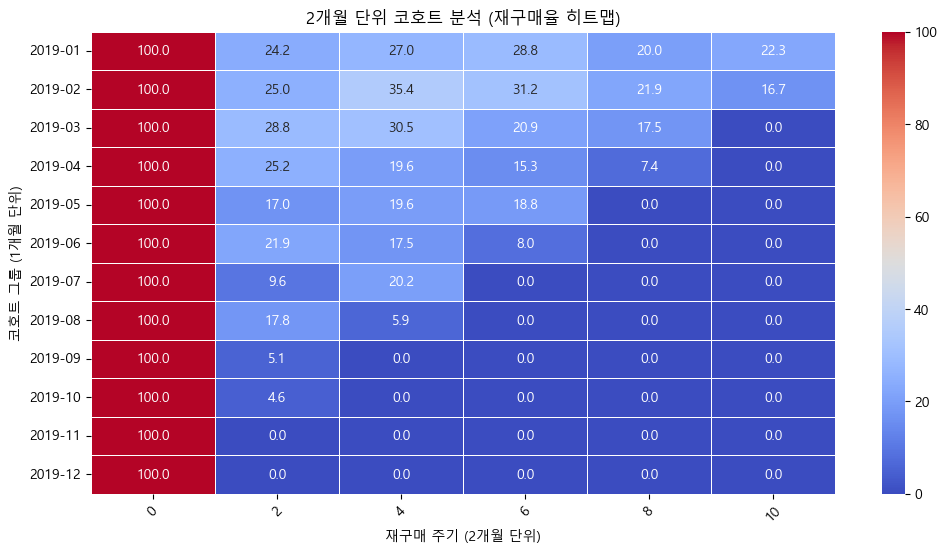

In [209]:

# 날짜 형식 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 고객별 첫 구매 날짜 계산
first_purchase = df.groupby('고객ID')['거래날짜'].min().reset_index()
first_purchase.rename(columns={'거래날짜': '첫 구매날짜'}, inplace=True)

# 고객 데이터 병합
df = df.merge(first_purchase, on='고객ID', how='left', suffixes=('', '_new'))
df.drop(columns=['첫 구매날짜_new'], inplace=True)  # 중복 컬럼 제거

# 코호트 그룹 생성 (최초 구매 기준, 월 단위)
df['코호트 그룹'] = df['첫 구매날짜'].dt.to_period('M')

# **재구매 주기 계산 (2개월 단위)**
df['재구매 주기'] = ((df['거래날짜'].dt.to_period('M') - df['첫 구매날짜'].dt.to_period('M')).apply(lambda x: x.n) // 2) * 2

# 코호트별 고객 수 집계
cohort_data = df.groupby(['코호트 그룹', '재구매 주기'])['고객ID'].nunique().reset_index()

# 최초 구매 고객 수 계산
first_purchase_counts = cohort_data[cohort_data['재구매 주기'] == 0][['코호트 그룹', '고객ID']]
first_purchase_counts.rename(columns={'고객ID': '최초 구매 고객 수'}, inplace=True)

# 재구매율 계산
cohort_data = cohort_data.merge(first_purchase_counts, on='코호트 그룹', how='left')
cohort_data['재구매율'] = (cohort_data['고객ID'] / cohort_data['최초 구매 고객 수']) * 100  # 백분율 변환

# 피벗 테이블 생성 (재구매율 기준)
cohort_pivot = cohort_data.pivot(index='코호트 그룹', columns='재구매 주기', values='재구매율').fillna(0)

# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_pivot, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("2개월 단위 코호트 분석 (재구매율 히트맵)")
plt.xlabel("재구매 주기 (2개월 단위)")
plt.ylabel("코호트 그룹 (1개월 단위)")
plt.xticks(rotation=45)
plt.show()


In [151]:


# 날짜 형식 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 고객별 첫 구매 날짜 계산
first_purchase = df.groupby('고객ID')['거래날짜'].min().reset_index()
first_purchase.rename(columns={'거래날짜': '첫 구매날짜'}, inplace=True)

# 병합 후 컬럼 확인
df = df.merge(first_purchase, on='고객ID', how='left')
print(df.columns)  # '첫 구매날짜' 존재 확인

# 2개월 단위 코호트 그룹 생성 (첫 구매 기준)
df['코호트 그룹'] = ((df['첫 구매날짜'].dt.year * 12 + df['첫 구매날짜'].dt.month) // 2)

# 거래가 발생한 월 계산 (재구매가 발생한 시점, 2개월 단위로 변환)
df['거래월'] = ((df['거래날짜'].dt.year * 12 + df['거래날짜'].dt.month) // 2)

# 최초 구매 고객 수 계산
cohort_initial = df.groupby('코호트 그룹')['고객ID'].nunique().reset_index()
cohort_initial.rename(columns={'고객ID': '최초 구매 고객 수'}, inplace=True)

# 코호트별 각 월(2개월 단위)별 남아 있는 고객 수 계산
cohort_data = df.groupby(['코호트 그룹', '거래월'])['고객ID'].nunique().reset_index()

# 최초 구매 고객 수와 병합하여 리텐션율 계산
cohort_data = cohort_data.merge(cohort_initial, on='코호트 그룹', how='left')
cohort_data['리텐션율(%)'] = (cohort_data['고객ID'] / cohort_data['최초 구매 고객 수']) * 100

# 피벗 테이블로 변환하여 히트맵 형태로 가공
cohort_pivot = cohort_data.pivot(index='코호트 그룹', columns='거래월', values='리텐션율(%)')

# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_pivot, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("2개월 단위 코호트 분석 (리텐션 히트맵)")
plt.xlabel("거래 월 (2개월 단위)")
plt.ylabel("코호트 그룹 (2개월 단위)")
plt.xticks(rotation=45)
plt.show()



Index(['고객ID', '거래ID', '거래날짜', '제품ID', '제품카테고리', '수량', '평균금액', '배송료', '쿠폰상태',
       '성별', '고객지역', '가입기간', '쿠폰코드', '할인율', '할인금액', '매출', '수익', '총 매출', '거래월',
       '첫 구매날짜_x', '코호트 그룹', '첫 구매날짜_y'],
      dtype='object')


KeyError: '첫 구매날짜'

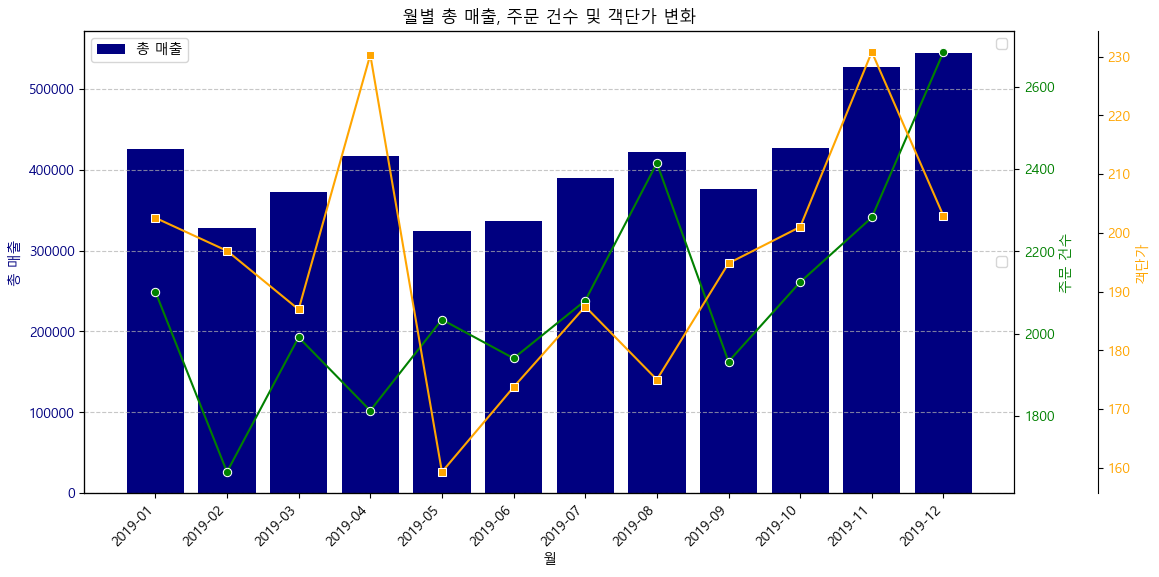

In [ ]:

# 거래 날짜를 datetime 형식으로 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 월별 총 매출, 주문 건수, 객단가 계산
df['거래월'] = df['거래날짜'].dt.to_period('M').astype(str)  # Period → 문자열 변환
monthly_sales = df.groupby('거래월').agg({'총 매출': 'sum', '거래ID': 'nunique'}).reset_index()
monthly_sales.rename(columns={'거래ID': '주문 건수'}, inplace=True)

# 객단가(AOV) 계산
monthly_sales['객단가'] = monthly_sales['총 매출'] / monthly_sales['주문 건수']

# 시각화 코드
fig, ax1 = plt.subplots(figsize=(12, 6))

# 총 매출 막대 그래프
bars = ax1.bar(monthly_sales['거래월'], monthly_sales['총 매출'], color='navy', label="총 매출")
ax1.set_ylabel("총 매출", color='navy')
ax1.set_xlabel("월")
ax1.set_title("월별 총 매출, 주문 건수 및 객단가 변화")
ax1.tick_params(axis='y', labelcolor='navy')
ax1.set_xticklabels(monthly_sales['거래월'], rotation=45, ha='right')

# 주문 건수 보조선 그래프 (초록색)
ax2 = ax1.twinx()
sns.lineplot(data=monthly_sales, x='거래월', y='주문 건수', color='green', marker='o', ax=ax2)
ax2.set_ylabel("주문 건수", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 객단가 보조선 그래프 (주황색)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(("outward", 60))  # 세 번째 축 위치 조정
sns.lineplot(data=monthly_sales, x='거래월', y='객단가', color='orange', marker='s', ax=ax3)
ax3.set_ylabel("객단가", color='orange')
ax3.tick_params(axis='y', labelcolor='orange')

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='center right')

# 그리드 추가
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()

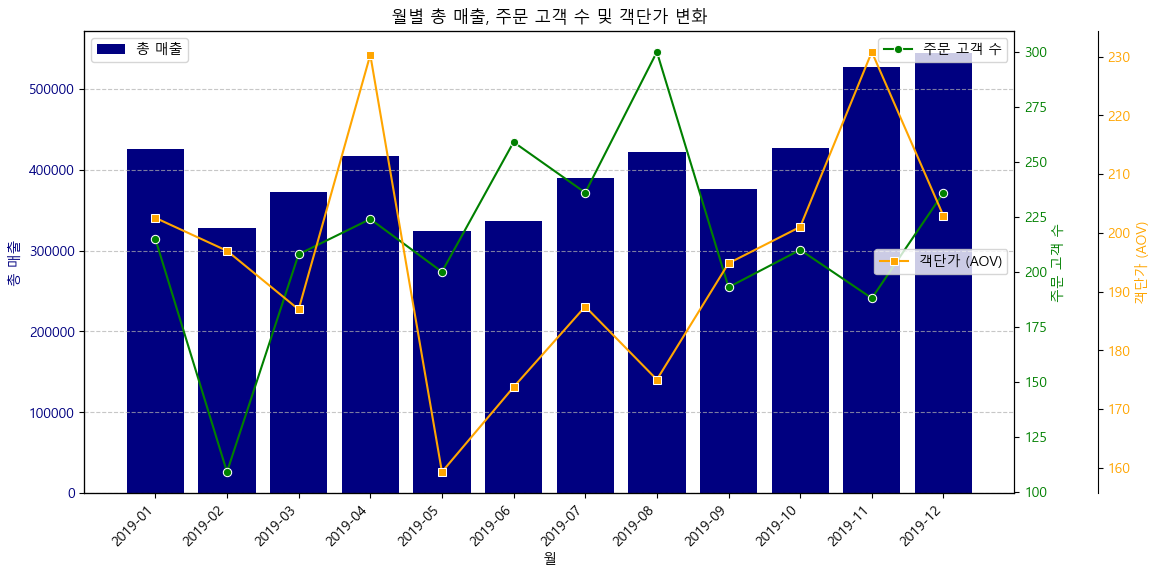

In [202]:
# 거래 날짜를 datetime 형식으로 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 월별 총 매출, 주문 건수, 주문 고객 수 계산
df['거래월'] = df['거래날짜'].dt.to_period('M').astype(str)  # Period → 문자열 변환
monthly_sales = df.groupby('거래월').agg({'총 매출': 'sum', '거래ID': 'nunique', '고객ID': 'nunique'}).reset_index()
monthly_sales.rename(columns={'거래ID': '주문 건수', '고객ID': '주문 고객 수'}, inplace=True)

# 객단가(AOV) 계산 (주문 건수 기준)
monthly_sales['객단가'] = monthly_sales['총 매출'] / monthly_sales['주문 건수']

# 시각화 코드
fig, ax1 = plt.subplots(figsize=(12, 6))

# 총 매출 막대 그래프
bars = ax1.bar(monthly_sales['거래월'], monthly_sales['총 매출'], color='navy', label="총 매출")
ax1.set_ylabel("총 매출", color='navy')
ax1.set_xlabel("월")
ax1.set_title("월별 총 매출, 주문 고객 수 및 객단가 변화")
ax1.tick_params(axis='y', labelcolor='navy')
ax1.set_xticklabels(monthly_sales['거래월'], rotation=45, ha='right')

# 주문 고객 수 보조선 그래프 (초록색)
ax2 = ax1.twinx()
sns.lineplot(data=monthly_sales, x='거래월', y='주문 고객 수', color='green', marker='o', ax=ax2, label="주문 고객 수")
ax2.set_ylabel("주문 고객 수", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 객단가 보조선 그래프 (주황색)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(("outward", 60))  # 세 번째 축 위치 조정
sns.lineplot(data=monthly_sales, x='거래월', y='객단가', color='orange', marker='s', ax=ax3, label="객단가 (AOV)")
ax3.set_ylabel("객단가 (AOV)", color='orange')
ax3.tick_params(axis='y', labelcolor='orange')

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='center right')

# 그리드 추가
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()


In [188]:

# 거래 날짜를 datetime 형식으로 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 주문 건수 계산 (동일 고객 & 동일 날짜의 여러 거래 ID는 1건으로 간주)
df_unique_orders = df.groupby(['거래날짜', '고객ID', '제품카테고리'])['거래ID'].nunique().reset_index()

# 월별 데이터 추가 (거래월을 문자열로 변환)
df_unique_orders['거래월'] = df_unique_orders['거래날짜'].dt.to_period('M').astype(str)

# 매출 집계 (월별 & 카테고리별)
monthly_sales = df.groupby(['거래월', '제품카테고리'])['총 매출'].sum().reset_index()
monthly_sales['거래월'] = monthly_sales['거래월'].astype(str)  # 데이터 타입 변환

# 매출 상위 5개 카테고리 선정 (각 월별)
selected_months = ['2019-01', '2019-02', '2019-04', '2019-05', '2019-08', '2019-12']
top_categories = monthly_sales[monthly_sales['거래월'].isin(selected_months)].groupby('거래월').apply(lambda x: x.nlargest(5, '총 매출')).reset_index(drop=True)

# 주문 건수 계산 (월별 & 카테고리별)
order_counts = df_unique_orders.groupby(['거래월', '제품카테고리'])['거래ID'].count().reset_index()
order_counts.rename(columns={'거래ID': '주문 건수'}, inplace=True)
order_counts['거래월'] = order_counts['거래월'].astype(str)  # 데이터 타입 변환

# 객단가(AOV) 계산 (월별 & 카테고리별)
category_revenue = df.groupby(['거래월', '제품카테고리'])['총 매출'].sum().reset_index()
category_revenue['거래월'] = category_revenue['거래월'].astype(str)  # 데이터 타입 변환
category_revenue = category_revenue.merge(order_counts, on=['거래월', '제품카테고리'], how='left')

# 객단가 계산
category_revenue['객단가(AOV)'] = category_revenue['총 매출'] / category_revenue['주문 건수']

# 최종 테이블 생성 (매출 TOP 5 카테고리 기준)
final_table = top_categories.merge(order_counts, on=['거래월', '제품카테고리'], how='left')
final_table = final_table.merge(category_revenue[['거래월', '제품카테고리', '객단가(AOV)']], on=['거래월', '제품카테고리'], how='left')

final_table

,거래월,제품카테고리,총 매출,주문 건수,객단가(AOV)
0,2019-01,Nest-USA,292823.76,219,1337.094795
1,2019-01,Apparel,42761.72,188,227.455957
2,2019-01,Office,30833.50,161,191.512422
3,2019-01,Drinkware,16578.85,122,135.892213
4,2019-01,Bags,11927.90,78,152.921795
5,2019-02,Nest-USA,202115.52,120,1684.296000
6,2019-02,Apparel,42930.76,123,349.030569
7,2019-02,Office,22267.13,97,229.558041
8,2019-02,Bags,19273.32,69,279.323478
9,2019-02,Drinkware,16114.31,92,175.155543


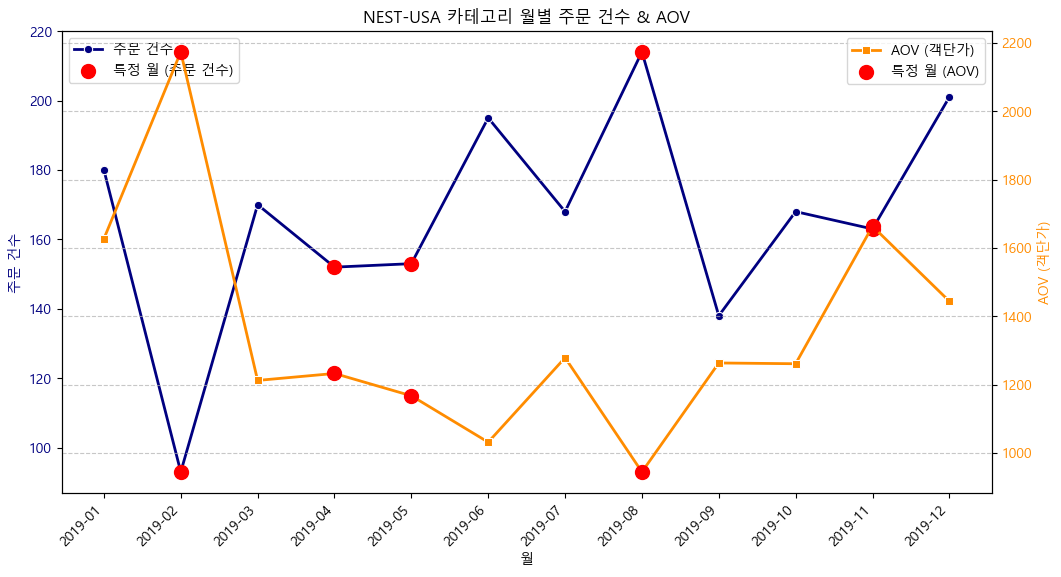

In [183]:
# 거래 날짜를 datetime 형식으로 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 월별 데이터 생성
df['거래월'] = df['거래날짜'].dt.to_period('M').astype(str)

# NEST-USA 카테고리만 필터링
df_nest = df[df['제품카테고리'] == 'Nest-USA']

# 월별 주문 건수 계산 (동일 고객 & 동일 날짜의 여러 거래 ID는 1건으로 간주)
df_nest_orders = df_nest.groupby(['거래월', '고객ID'])['거래ID'].nunique().reset_index()
monthly_order_counts = df_nest_orders.groupby('거래월')['거래ID'].count().reset_index()
monthly_order_counts.rename(columns={'거래ID': '주문 건수'}, inplace=True)

# 월별 총 매출 집계
monthly_revenue = df_nest.groupby('거래월')['총 매출'].sum().reset_index()

# AOV (평균 주문 금액) 계산
monthly_aov = monthly_revenue.merge(monthly_order_counts, on='거래월', how='left')
monthly_aov['AOV'] = monthly_aov['총 매출'] / monthly_aov['주문 건수']

# 특정 월 표시 (2, 4, 5, 8, 12월)
highlight_months = ['2019-02', '2019-04', '2019-05', '2019-08', '2019-11']

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 주문 건수 선 그래프
sns.lineplot(data=monthly_aov, x='거래월', y='주문 건수', color='navy', marker='o', linewidth=2, ax=ax1, label="주문 건수")
ax1.set_ylabel("주문 건수", color='navy')
ax1.set_xlabel("월")
ax1.set_title("NEST-USA 카테고리 월별 주문 건수 & AOV")
ax1.tick_params(axis='y', labelcolor='navy')
ax1.set_xticklabels(monthly_aov['거래월'], rotation=45, ha='right')

# AOV 선 그래프 (보조축)
ax2 = ax1.twinx()
sns.lineplot(data=monthly_aov, x='거래월', y='AOV', color='darkorange', marker='s', linewidth=2, ax=ax2, label="AOV (객단가)")
ax2.set_ylabel("AOV (객단가)", color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# 특정 월(2, 4, 5, 8, 11월)에 빨간 점 표시
highlight_data = monthly_aov[monthly_aov['거래월'].isin(highlight_months)]
ax1.scatter(highlight_data['거래월'], highlight_data['주문 건수'], color='red', s=100, zorder=3, label="특정 월 (주문 건수)")
ax2.scatter(highlight_data['거래월'], highlight_data['AOV'], color='red', s=100, zorder=3, label="특정 월 (AOV)")

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 출력
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



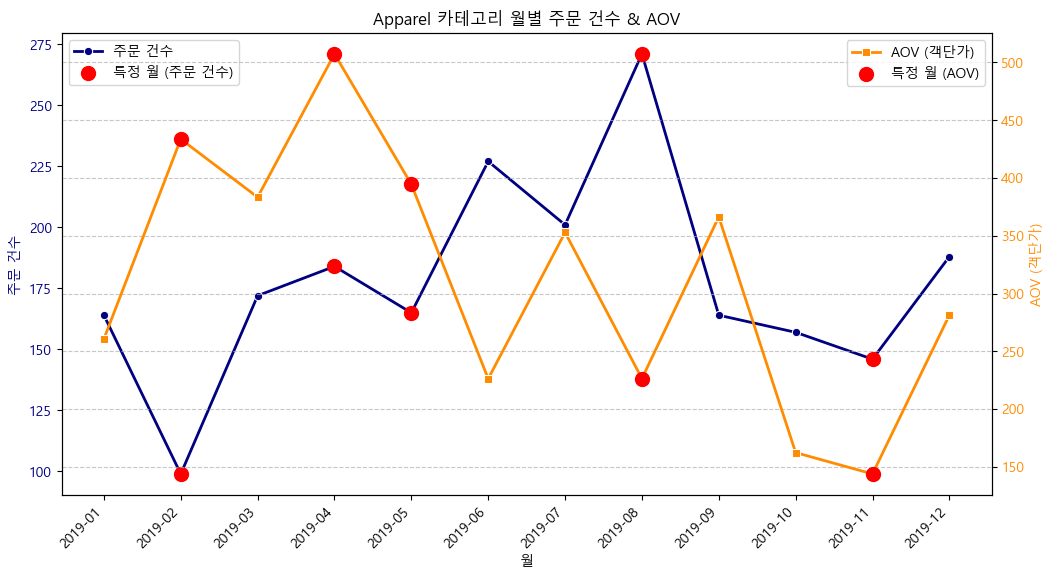

In [185]:

# 거래 날짜를 datetime 형식으로 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 월별 데이터 생성
df['거래월'] = df['거래날짜'].dt.to_period('M').astype(str)

# Apparel 카테고리만 필터링
df_apparel = df[df['제품카테고리'] == 'Apparel']

# 월별 주문 건수 계산 (동일 고객 & 동일 날짜의 여러 거래 ID는 1건으로 간주)
df_apparel_orders = df_apparel.groupby(['거래월', '고객ID'])['거래ID'].nunique().reset_index()
monthly_order_counts = df_apparel_orders.groupby('거래월')['거래ID'].count().reset_index()
monthly_order_counts.rename(columns={'거래ID': '주문 건수'}, inplace=True)

# 월별 총 매출 집계
monthly_revenue = df_apparel.groupby('거래월')['총 매출'].sum().reset_index()

# AOV (평균 주문 금액) 계산
monthly_aov = monthly_revenue.merge(monthly_order_counts, on='거래월', how='left')
monthly_aov['AOV'] = monthly_aov['총 매출'] / monthly_aov['주문 건수']

# 특정 월 표시 (2, 4, 5, 8, 11월)
highlight_months = ['2019-02', '2019-04', '2019-05', '2019-08', '2019-11']

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 주문 건수 선 그래프
sns.lineplot(data=monthly_aov, x='거래월', y='주문 건수', color='navy', marker='o', linewidth=2, ax=ax1, label="주문 건수")
ax1.set_ylabel("주문 건수", color='navy')
ax1.set_xlabel("월")
ax1.set_title("Apparel 카테고리 월별 주문 건수 & AOV")
ax1.tick_params(axis='y', labelcolor='navy')
ax1.set_xticklabels(monthly_aov['거래월'], rotation=45, ha='right')

# AOV 선 그래프 (보조축)
ax2 = ax1.twinx()
sns.lineplot(data=monthly_aov, x='거래월', y='AOV', color='darkorange', marker='s', linewidth=2, ax=ax2, label="AOV (객단가)")
ax2.set_ylabel("AOV (객단가)", color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# 특정 월(2, 4, 5, 8, 11월)에 빨간 점 표시
highlight_data = monthly_aov[monthly_aov['거래월'].isin(highlight_months)]
ax1.scatter(highlight_data['거래월'], highlight_data['주문 건수'], color='red', s=100, zorder=3, label="특정 월 (주문 건수)")
ax2.scatter(highlight_data['거래월'], highlight_data['AOV'], color='red', s=100, zorder=3, label="특정 월 (AOV)")

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 출력
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


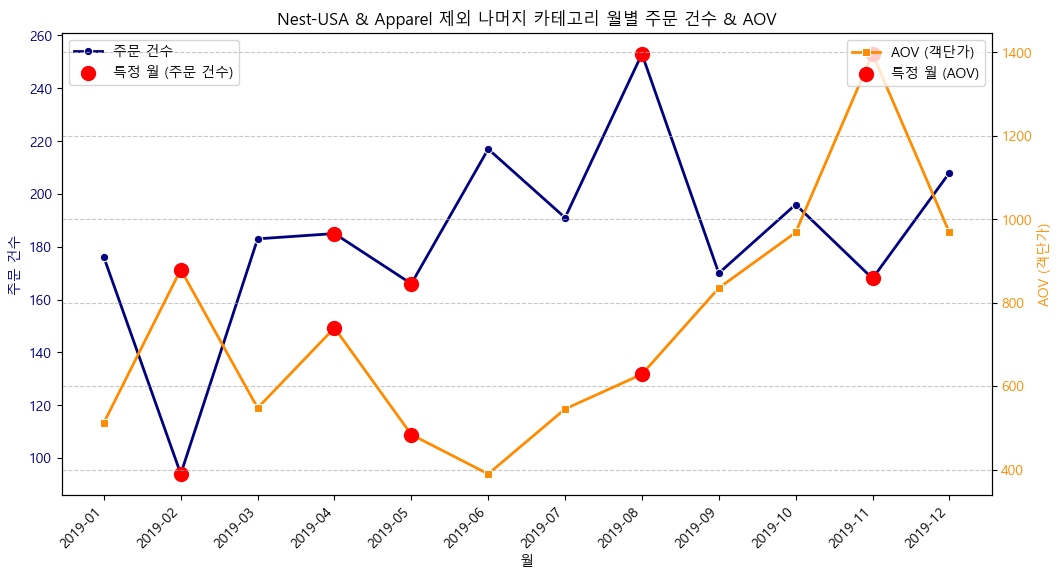

In [186]:

# 거래 날짜를 datetime 형식으로 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 월별 데이터 생성
df['거래월'] = df['거래날짜'].dt.to_period('M').astype(str)

# Nest-USA & Apparel 제외한 나머지 카테고리 필터링
df_other = df[~df['제품카테고리'].isin(['Nest-USA', 'Apparel'])]

# 월별 주문 건수 계산 (동일 고객 & 동일 날짜의 여러 거래 ID는 1건으로 간주)
df_other_orders = df_other.groupby(['거래월', '고객ID'])['거래ID'].nunique().reset_index()
monthly_order_counts = df_other_orders.groupby('거래월')['거래ID'].count().reset_index()
monthly_order_counts.rename(columns={'거래ID': '주문 건수'}, inplace=True)

# 월별 총 매출 집계
monthly_revenue = df_other.groupby('거래월')['총 매출'].sum().reset_index()

# AOV (평균 주문 금액) 계산
monthly_aov = monthly_revenue.merge(monthly_order_counts, on='거래월', how='left')
monthly_aov['AOV'] = monthly_aov['총 매출'] / monthly_aov['주문 건수']

# 특정 월 표시 (2, 4, 5, 8, 11월)
highlight_months = ['2019-02', '2019-04', '2019-05', '2019-08', '2019-11']

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 주문 건수 선 그래프
sns.lineplot(data=monthly_aov, x='거래월', y='주문 건수', color='navy', marker='o', linewidth=2, ax=ax1, label="주문 건수")
ax1.set_ylabel("주문 건수", color='navy')
ax1.set_xlabel("월")
ax1.set_title("Nest-USA & Apparel 제외 나머지 카테고리 월별 주문 건수 & AOV")
ax1.tick_params(axis='y', labelcolor='navy')
ax1.set_xticklabels(monthly_aov['거래월'], rotation=45, ha='right')

# AOV 선 그래프 (보조축)
ax2 = ax1.twinx()
sns.lineplot(data=monthly_aov, x='거래월', y='AOV', color='darkorange', marker='s', linewidth=2, ax=ax2, label="AOV (객단가)")
ax2.set_ylabel("AOV (객단가)", color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# 특정 월(2, 4, 5, 8, 11월)에 빨간 점 표시
highlight_data = monthly_aov[monthly_aov['거래월'].isin(highlight_months)]
ax1.scatter(highlight_data['거래월'], highlight_data['주문 건수'], color='red', s=100, zorder=3, label="특정 월 (주문 건수)")
ax2.scatter(highlight_data['거래월'], highlight_data['AOV'], color='red', s=100, zorder=3, label="특정 월 (AOV)")

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 출력
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


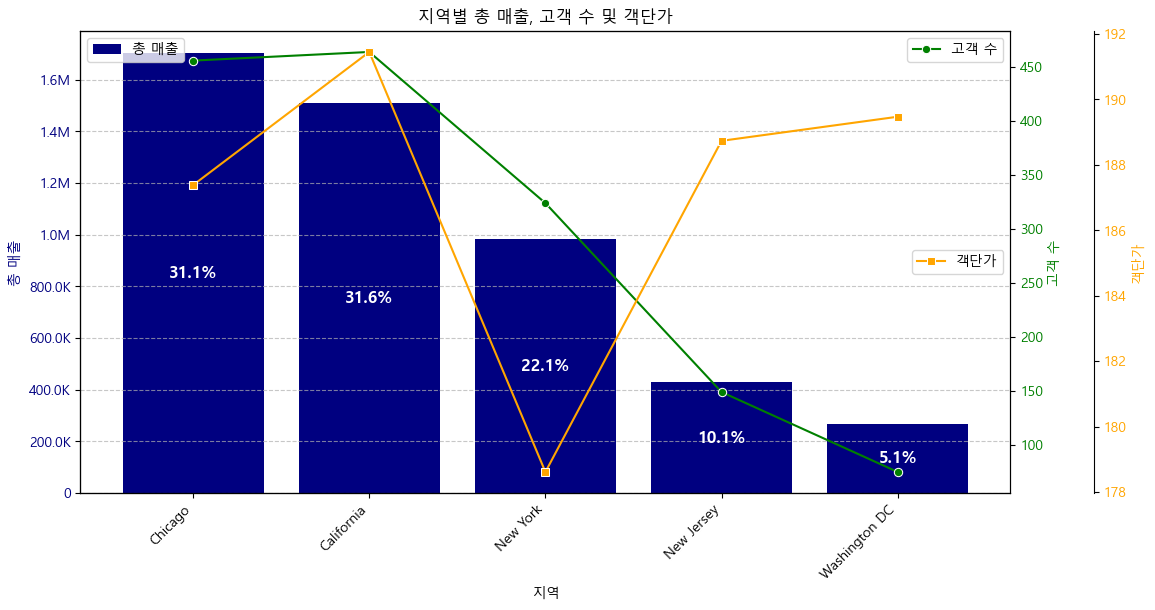

In [195]:

# 거래 날짜를 datetime 형식으로 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 지역별 총 매출, 고객 수, 객단가 계산
region_sales = df.groupby('고객지역').agg({'총 매출': 'sum', '고객ID': 'nunique', '거래ID': 'nunique'}).reset_index()
region_sales.rename(columns={'고객ID': '고객 수', '거래ID': '주문 건수'}, inplace=True)

# 전체 고객 수 계산
total_customers = region_sales['고객 수'].sum()

# 지역별 고객 비율 (%) 계산
region_sales['고객 비율(%)'] = (region_sales['고객 수'] / total_customers) * 100

# 객단가(AOV) 계산
region_sales['객단가'] = region_sales['총 매출'] / region_sales['주문 건수']

# 지역별 정렬 (매출 기준 내림차순)
region_sales = region_sales.sort_values(by='총 매출', ascending=False)

# Y축 단위 변환 함수 (K=천 단위, M=백만 단위)
def format_y_axis(value, _):
    if value >= 1_000_000:
        return f'{value/1_000_000:.1f}M'  # 백만 단위
    elif value >= 1_000:
        return f'{value/1_000:.1f}K'  # 천 단위
    else:
        return f'{value:.0f}'  # 기본

# 시각화 코드
fig, ax1 = plt.subplots(figsize=(12, 6))

# 지역별 총 매출 막대 그래프
bars = ax1.bar(region_sales['고객지역'], region_sales['총 매출'], color='navy', label="총 매출")
ax1.set_ylabel("총 매출", color='navy')
ax1.set_xlabel("지역")
ax1.set_title("지역별 총 매출, 고객 수 및 객단가")
ax1.tick_params(axis='y', labelcolor='navy')
ax1.set_xticklabels(region_sales['고객지역'], rotation=45, ha='right')

# Y축 매출 단위 변환 적용
ax1.yaxis.set_major_formatter(plt.FuncFormatter(format_y_axis))

# 막대 안에 고객 비율(%) 화이트 컬러로 표시
for bar, ratio in zip(bars, region_sales['고객 비율(%)']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 0.5, f'{ratio:.1f}%', 
             ha='center', va='center', fontsize=12, color='white', fontweight='bold')

# 고객 수 보조선 그래프 (초록색)
ax2 = ax1.twinx()
sns.lineplot(data=region_sales, x='고객지역', y='고객 수', color='green', marker='o', ax=ax2, label="고객 수")
ax2.set_ylabel("고객 수", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 객단가 보조선 그래프 (주황색)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(("outward", 60))  # 세 번째 축 위치 조정
sns.lineplot(data=region_sales, x='고객지역', y='객단가', color='orange', marker='s', ax=ax3, label="객단가")
ax3.set_ylabel("객단가", color='orange')
ax3.tick_params(axis='y', labelcolor='orange')

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='center right')

# 그리드 추가
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()


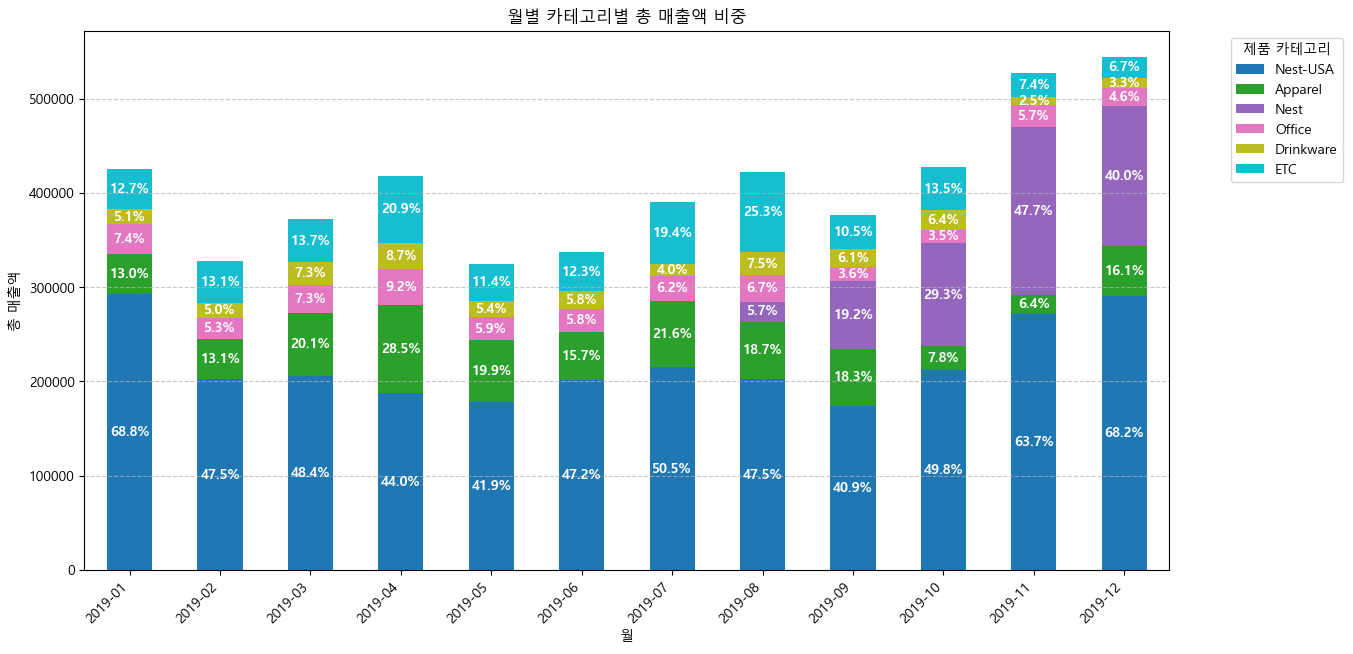

In [ ]:
# 거래 날짜를 datetime 형식으로 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])
df['거래월'] = df['거래날짜'].dt.to_period('M')

# 월별 카테고리별 매출 집계
category_sales = df.groupby(['거래월', '제품카테고리'])['총 매출'].sum().reset_index()

# 가장 매출이 높은 상위 5개 카테고리 선택 (전체 기간 기준)
top_categories = category_sales.groupby('제품카테고리')['총 매출'].sum().nlargest(5).index

# ETC 카테고리로 묶기
category_sales['제품카테고리'] = category_sales['제품카테고리'].apply(lambda x: x if x in top_categories else 'ETC')

# 카테고리 정렬 (ETC를 마지막으로 이동)
category_sales['제품카테고리'] = pd.Categorical(category_sales['제품카테고리'], categories=list(top_categories) + ['ETC'], ordered=True)

# 데이터 피벗
category_pivot = category_sales.pivot_table(index='거래월', columns='제품카테고리', values='총 매출', aggfunc='sum')

# 시각화 (Stacked Bar Chart)
fig, ax = plt.subplots(figsize=(14, 7))

bars = category_pivot.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab10', ax=ax)

# 비율(%) 표시
for i, bar_container in enumerate(bars.containers):
    for bar in bar_container:
        if bar.get_height() > 0:  # 값이 있는 경우만 표시
            total_monthly_sales = category_pivot.iloc[i].sum()  # 해당 월의 총 매출
            height = bar.get_y() + bar.get_height() / 2  # 막대 중앙
            percentage = (bar.get_height() / total_monthly_sales) * 100
            ax.text(bar.get_x() + bar.get_width() / 2, height, f"{percentage:.1f}%", 
                    ha='center', va='center', fontsize=10, color='white', fontweight='bold')

plt.xlabel("월")
plt.ylabel("총 매출액")
plt.title("월별 카테고리별 총 매출액 비중")
plt.xticks(rotation=45, ha='right')
plt.legend(title="제품 카테고리", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()

In [198]:
# 거래 날짜를 datetime 형식으로 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 거래월 컬럼 생성
df['거래월'] = df['거래날짜'].dt.to_period('M').astype(str)

# 8~12월 데이터 필터링
df_filtered = df[(df['거래월'] >= '2019-08') & (df['거래월'] <= '2019-12')]

# Apparel 카테고리만 선택
df_apparel = df_filtered[df_filtered['제품카테고리'] == 'Apparel']

# 지역별 & 월별 매출 집계
region_sales_apparel = df_apparel.groupby(['거래월', '고객지역'])['총 매출'].sum().reset_index()

# 피벗 테이블로 변환 (행: 거래월, 열: 지역, 값: 매출액)
region_sales_pivot = region_sales_apparel.pivot(index='거래월', columns='고객지역', values='총 매출').fillna(0)
region_sales_pivot

고객지역,California,Chicago,New Jersey,New York,Washington DC
거래월,,,,,
2019-08,16391.56,22358.14,3975.69,14845.88,3773.37
2019-09,17640.62,22543.74,9050.38,6533.29,4309.79
2019-10,6590.43,9642.78,2001.92,5452.25,1797.05
2019-11,5883.36,6902.13,1881.22,4986.37,1350.00
2019-12,13550.07,28573.51,4008.86,5480.45,1273.88


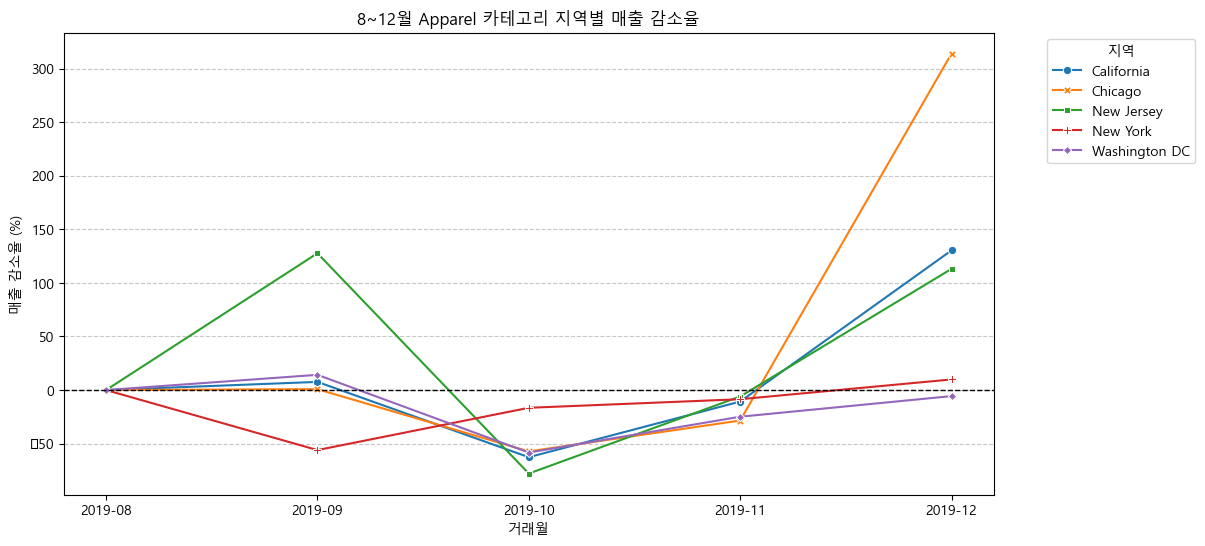

In [ ]:

# 거래 날짜를 datetime 형식으로 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 거래월 컬럼 생성
df['거래월'] = df['거래날짜'].dt.to_period('M').astype(str)

# 8~12월 데이터 필터링
df_filtered = df[(df['거래월'] >= '2019-08') & (df['거래월'] <= '2019-12')]

# Apparel 카테고리만 선택
df_apparel = df_filtered[df_filtered['제품카테고리'] == 'Apparel']

# 지역별 & 월별 매출 집계
region_sales_apparel = df_apparel.groupby(['거래월', '고객지역'])['총 매출'].sum().reset_index()

# 피벗 테이블로 변환 (행: 거래월, 열: 지역, 값: 매출액)
region_sales_pivot = region_sales_apparel.pivot(index='거래월', columns='고객지역', values='총 매출').fillna(0)

# 매출 감소율 계산 (전월 대비 변화율)
region_sales_pct_change = region_sales_pivot.pct_change().fillna(0) * 100

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=region_sales_pct_change, markers=True, dashes=False)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # 0% 변화선 추가
plt.xlabel("거래월")
plt.ylabel("매출 감소율 (%)")
plt.title("8~12월 Apparel 카테고리 지역별 매출 감소율")
plt.legend(title="지역", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


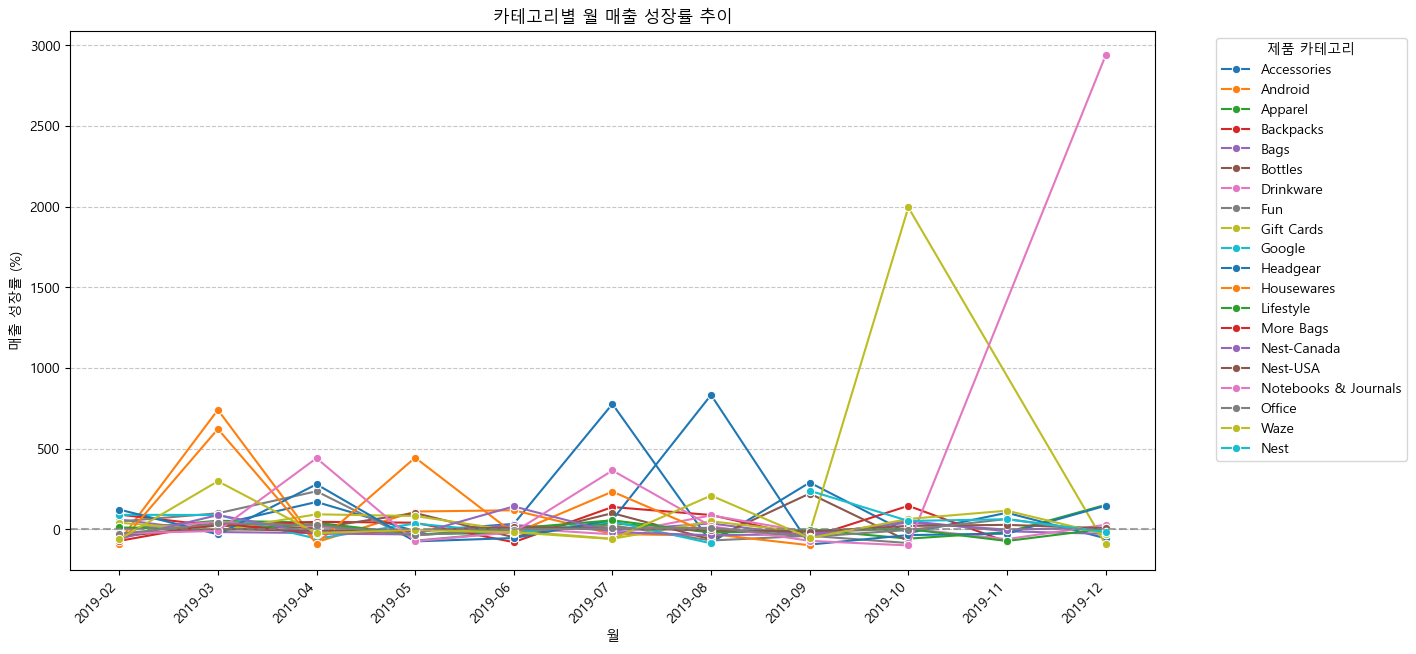

In [ ]:
# 거래 날짜를 datetime 형식으로 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])
df['거래월'] = df['거래날짜'].dt.to_period('M')

# 월별 카테고리별 매출 집계
category_sales = df.groupby(['거래월', '제품카테고리'])['총 매출'].sum().reset_index()

# 각 카테고리별 성장률 계산 (이전 달 대비 변화율)
category_sales['전월 매출'] = category_sales.groupby('제품카테고리')['총 매출'].shift(1)
category_sales['매출 성장률(%)'] = ((category_sales['총 매출'] - category_sales['전월 매출']) / category_sales['전월 매출']) * 100

# 데이터 타입 변환
category_sales['거래월'] = category_sales['거래월'].astype(str)

# 시각화 코드
plt.figure(figsize=(14, 7))
sns.lineplot(data=category_sales, x='거래월', y='매출 성장률(%)', hue='제품카테고리', marker='o', palette='tab10')

plt.xlabel("월")
plt.ylabel("매출 성장률 (%)")
plt.title("카테고리별 월 매출 성장률 추이")
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)  # 기준선(0%) 추가
plt.xticks(rotation=45, ha='right')
plt.legend(title="제품 카테고리", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()

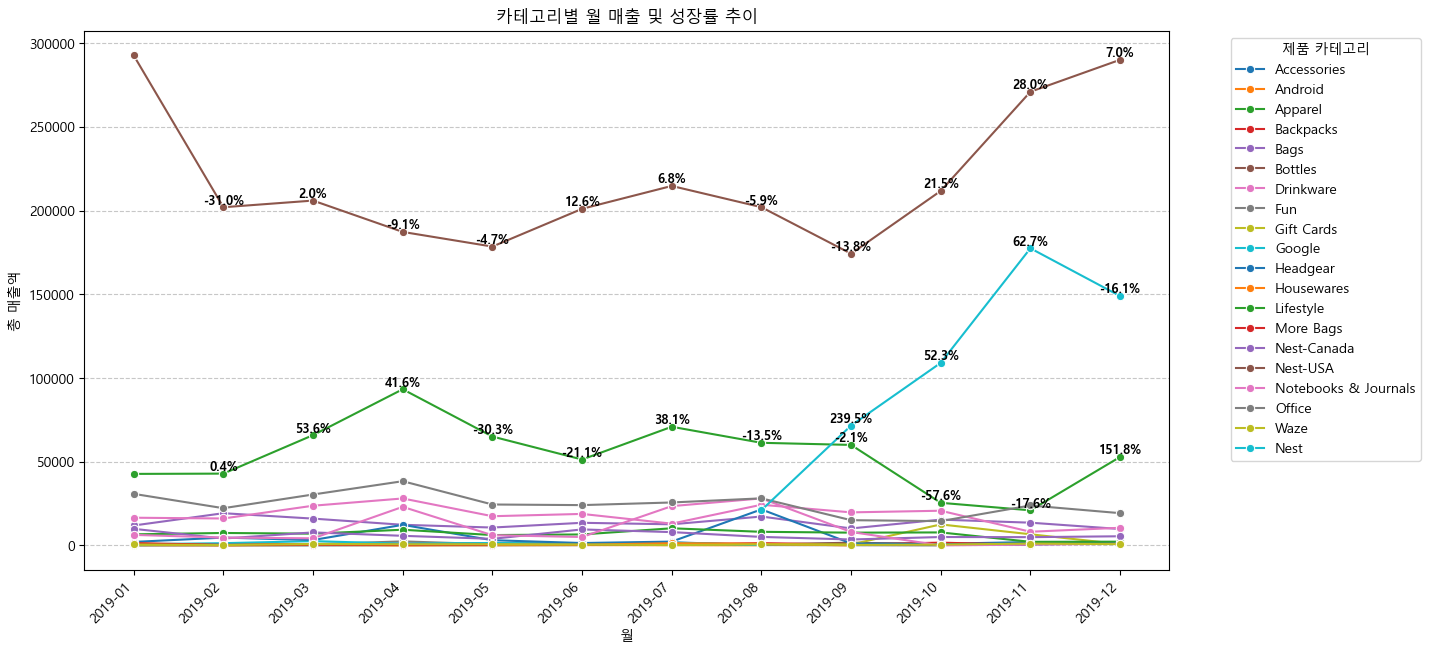

In [ ]:
# 거래 날짜를 datetime 형식으로 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])
df['거래월'] = df['거래날짜'].dt.to_period('M')

# 월별 카테고리별 매출 집계
category_sales = df.groupby(['거래월', '제품카테고리'])['총 매출'].sum().reset_index()

# 각 카테고리별 성장률 계산 (이전 달 대비 변화율)
category_sales['전월 매출'] = category_sales.groupby('제품카테고리')['총 매출'].shift(1)
category_sales['매출 성장률(%)'] = ((category_sales['총 매출'] - category_sales['전월 매출']) / category_sales['전월 매출']) * 100

# 데이터 타입 변환
category_sales['거래월'] = category_sales['거래월'].astype(str)

# 시각화 코드
plt.figure(figsize=(14, 7))

# 매출액 라인 그래프
sns.lineplot(data=category_sales, x='거래월', y='총 매출', hue='제품카테고리', marker='o', palette='tab10')

# 성장률 %를 google, lifestyle, bottle 카테고리만 표시
for i in range(len(category_sales)):
    category = category_sales.iloc[i]['제품카테고리']
    if category in ['Nest', 'Apparel', 'Nest-USA']:
        if not pd.isna(category_sales.iloc[i]['매출 성장률(%)']):  # NaN 값 제외
            plt.text(category_sales.iloc[i]['거래월'], category_sales.iloc[i]['총 매출'],
                     f"{category_sales.iloc[i]['매출 성장률(%)']:.1f}%", 
                     ha='center', va='bottom', fontsize=9, color='black', fontweight='bold')

plt.xlabel("월")
plt.ylabel("총 매출액")
plt.title("카테고리별 월 매출 및 성장률 추이")
plt.xticks(rotation=45, ha='right')
plt.legend(title="제품 카테고리", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()


In [ ]:


# 거래 날짜를 datetime 형식으로 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 고객별 총 매출액 계산
ltv = df.groupby('고객ID').agg({'총 매출': 'sum'}).rename(columns={'총 매출': '총구매금액'})

# 고객별 실제 구매 횟수 계산 (동일 고객이 같은 날 여러 번 구매한 경우 1번으로 계산)
unique_transactions = df.groupby(['고객ID', '거래날짜']).size().reset_index().groupby('고객ID').size().reset_index()
unique_transactions.rename(columns={0: '구매횟수'}, inplace=True)

# 구매 횟수를 LTV 데이터에 병합
ltv = ltv.merge(unique_transactions, on='고객ID', how='left')

# 평균 구매 금액 계산
ltv['평균구매금액'] = ltv['총구매금액'] / ltv['구매횟수']

# 2019년 1년간의 구매데이터이므로 평균구매빈도를 365일 기준으로 계산
ltv['평균구매빈도'] = ltv['구매횟수'] / 365

# 고객별 2019년 첫 거래일 기준으로 가입 기간 계산 (월 단위)
first_purchase = df.groupby('고객ID')['거래날짜'].min().reset_index()  # 최초 거래 날짜
first_purchase.rename(columns={'거래날짜': '첫거래일'}, inplace=True)

# 고객별 가입기간을 월 단위로 계산
df = df.merge(first_purchase, on='고객ID', how='left')
df['가입기간(월)'] = ((df['거래날짜'].dt.year - df['첫거래일'].dt.year) * 12 +
                     (df['거래날짜'].dt.month - df['첫거래일'].dt.month))

# 가입 기간을 년 단위로 변환
df['가입기간(년)'] = df['가입기간(월)'] / 12

# 고객별 가입기간 최신 값 유지 (최신 거래 기준)
latest_join_duration = df.groupby('고객ID')['가입기간(년)'].max().reset_index()

# LTV 데이터와 병합
ltv = pd.merge(ltv, latest_join_duration, on='고객ID', how='left')

# 고객생애가치(LTV) 계산 (가입기간을 2019년 첫 거래일부터 계산)
ltv['고객생애가치'] = ltv['가입기간(년)'] * ltv['평균구매금액'] * ltv['평균구매빈도']

# LTV 상위 10명 추출
ltv_top10 = ltv.nlargest(10, '고객생애가치')

# 결과 출력
ltv_top10


,고객ID,총구매금액,구매횟수,평균구매금액,평균구매빈도,가입기간(년),고객생애가치
736,USER_0736,78269.43,24,3261.226250,0.065753,0.916667,196.567062
563,USER_0563,59673.78,27,2210.140000,0.073973,0.916667,149.865658
118,USER_0118,78215.54,34,2300.457059,0.093151,0.666667,142.859434
643,USER_0643,51624.72,26,1985.566154,0.071233,0.916667,129.651123
1355,USER_1355,48538.24,20,2426.912000,0.054795,0.916667,121.899689
202,USER_0202,28485.71,20,1424.285500,0.054795,0.833333,65.035868
667,USER_0667,28241.77,8,3530.221250,0.021918,0.750000,58.031034
447,USER_0447,21588.01,10,2158.801000,0.027397,0.916667,54.216463
703,USER_0703,23979.69,7,3425.670000,0.019178,0.750000,49.273336
850,USER_0850,21544.43,7,3077.775714,0.019178,0.833333,49.188196


In [ ]:
# 전체 고객 수 계산
total_customers = len(ltv)

# 상위 20% 고객 수 계산
top_20_pct_count = int(total_customers * 0.2)

# LTV 기준 상위 20% 고객 추출
ltv_sorted = ltv.sort_values(by='고객생애가치', ascending=False)
ltv_top_20 = ltv_sorted.head(top_20_pct_count)

# 전체 매출과 상위 20% 고객 매출 합계 계산
total_revenue = ltv['총구매금액'].sum()
top_20_revenue = ltv_top_20['총구매금액'].sum()

# 상위 20% 고객의 매출 기여도 (%) 계산
top_20_pct_revenue_ratio = (top_20_revenue / total_revenue) * 100

# 결과 출력
print(f"상위 20% 고객의 총 매출 합계: {top_20_revenue:,.0f}")
print(f"전체 매출: {total_revenue:,.0f}")
print(f"상위 20% 고객이 전체 매출에서 차지하는 비율: {top_20_pct_revenue_ratio:.2f}%")


상위 20% 고객의 총 매출 합계: 2,477,737
전체 매출: 4,891,317
상위 20% 고객이 전체 매출에서 차지하는 비율: 50.66%


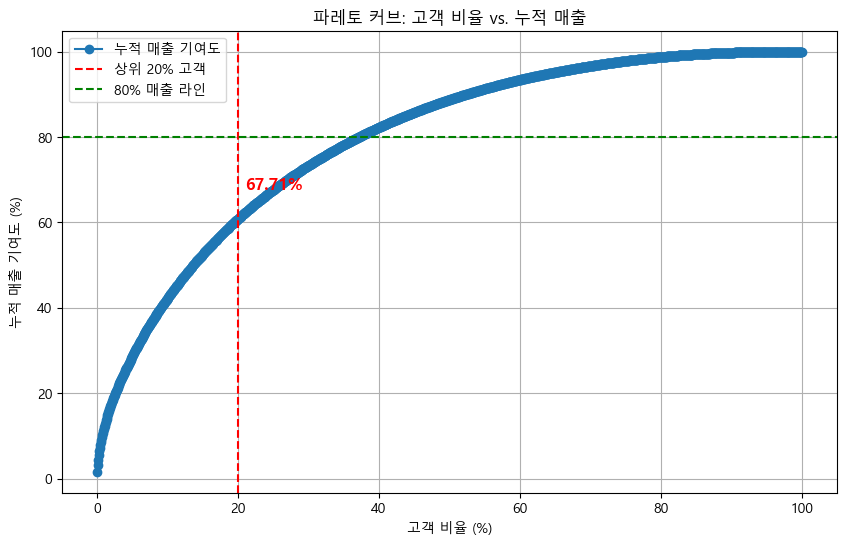

In [ ]:

# 고객별 총 구매금액 기준 정렬
ltv_sorted = ltv.sort_values(by='총구매금액', ascending=False)

# 누적 매출 비율 계산
ltv_sorted['누적매출비율'] = ltv_sorted['총구매금액'].cumsum() / ltv_sorted['총구매금액'].sum()

# 고객 비율 (누적)
ltv_sorted['고객비율'] = np.arange(1, len(ltv_sorted) + 1) / len(ltv_sorted)

# 상위 20% 고객이 차지하는 누적 매출 비율 찾기
top_20_percent_value = ltv_sorted.loc[int(len(ltv_sorted) * 0.2), '누적매출비율'] * 100  # % 변환

# 파레토 커브 시각화
plt.figure(figsize=(10, 6))
plt.plot(ltv_sorted['고객비율'] * 100, ltv_sorted['누적매출비율'] * 100, marker='o', linestyle='-', label="누적 매출 기여도")

# 20% 고객 지점에 세로선 추가
plt.axvline(x=20, color='r', linestyle='--', label="상위 20% 고객")

# 80% 매출 라인 가로선 추가
plt.axhline(y=80, color='g', linestyle='--', label="80% 매출 라인")

# 상위 20% 고객 기여도 수치 표시
plt.text(21, top_20_percent_value, f"{top_20_percent_value:.2f}%", fontsize=12, color='red', fontweight='bold')

# 그래프 설정
plt.xlabel("고객 비율 (%)")
plt.ylabel("누적 매출 기여도 (%)")
plt.title("파레토 커브: 고객 비율 vs. 누적 매출")
plt.legend()
plt.grid()
plt.show()



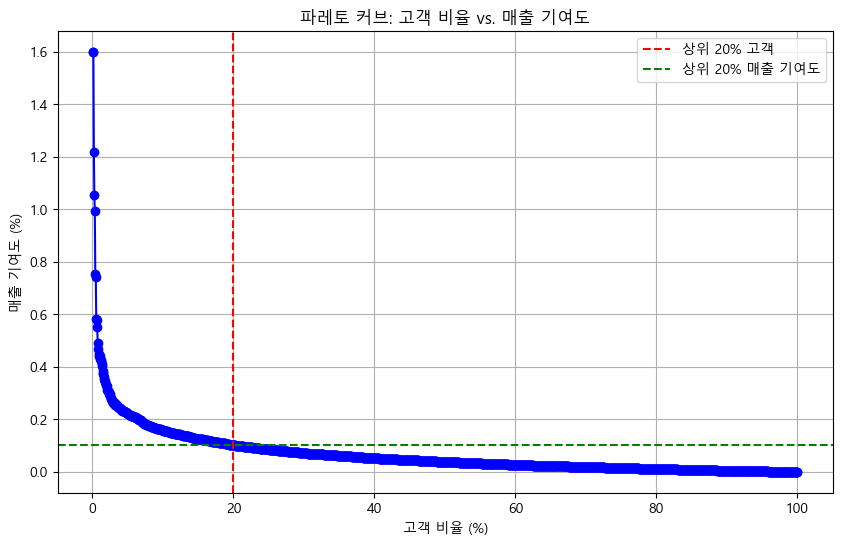

In [ ]:

# 고객별 총 매출 정렬 (내림차순)
ltv_sorted = ltv[['고객ID', '총구매금액']].sort_values(by='총구매금액', ascending=False).reset_index(drop=True)

# 전체 매출 계산
total_sales = ltv_sorted['총구매금액'].sum()

# 각 고객의 개별 매출 기여도 (%) 계산
ltv_sorted['매출 기여도 (%)'] = (ltv_sorted['총구매금액'] / total_sales) * 100

# 고객 비율 (%) 계산
ltv_sorted['고객 비율 (%)'] = (np.arange(1, len(ltv_sorted) + 1) / len(ltv_sorted)) * 100

# 📈 매출 기여도(%) vs. 고객 비율(%) 시각화
plt.figure(figsize=(10, 6))
plt.plot(ltv_sorted['고객 비율 (%)'], ltv_sorted['매출 기여도 (%)'], marker='o', linestyle='-', color='b')

# 상위 20% 고객 지점 강조
top_20_percent_idx = int(len(ltv_sorted) * 0.2)
plt.axvline(x=20, color='red', linestyle='dashed', label="상위 20% 고객")
plt.axhline(y=ltv_sorted.loc[top_20_percent_idx, '매출 기여도 (%)'], color='green', linestyle='dashed', label="상위 20% 매출 기여도")

# 그래프 설정
plt.xlabel("고객 비율 (%)")
plt.ylabel("매출 기여도 (%)")
plt.title("파레토 커브: 고객 비율 vs. 매출 기여도")
plt.legend()
plt.grid()

plt.show()


In [ ]:
# 필요한 라이브러리 다시 로드
import pandas as pd
import numpy as np

# 가상의 고객별 매출 데이터 생성 (실제 데이터가 초기화되었기 때문에 재구성)
np.random.seed(42)
customer_count = 1400
customer_ids = [f"CUST_{i}" for i in range(1, customer_count + 1)]
total_sales = np.random.exponential(scale=1000, size=customer_count)  # 고객별 총 매출 (임의 분포)

# LTV 데이터프레임 생성
ltv_df = pd.DataFrame({"고객ID": customer_ids, "총구매금액": total_sales})

# 고객별 매출을 내림차순 정렬
ltv_df = ltv_df.sort_values(by="총구매금액", ascending=False)

# 총 매출 합산
total_revenue = ltv_df["총구매금액"].sum()

# 고객별 누적 매출 계산
ltv_df["누적 매출"] = ltv_df["총구매금액"].cumsum()

# 고객 비율 계산 (전체 고객 대비 누적 %)
ltv_df["고객 비율 (%)"] = np.linspace(0, 100, len(ltv_df))

# 누적 매출 기여도 (%)
ltv_df["누적 매출 기여도 (%)"] = (ltv_df["누적 매출"] / total_revenue) * 100

# 20% 지점에서의 매출 기여도 확인
top_20_percent_value = ltv_df[ltv_df["고객 비율 (%)"] <= 20]["누적 매출 기여도 (%)"].max()

# 80% 매출을 차지하는 고객 비율 확인
eighty_percent_point = ltv_df[ltv_df["누적 매출 기여도 (%)"] >= 80]["고객 비율 (%)"].min()

(top_20_percent_value, eighty_percent_point)


(np.float64(52.52703026913472), np.float64(43.245175125089354))

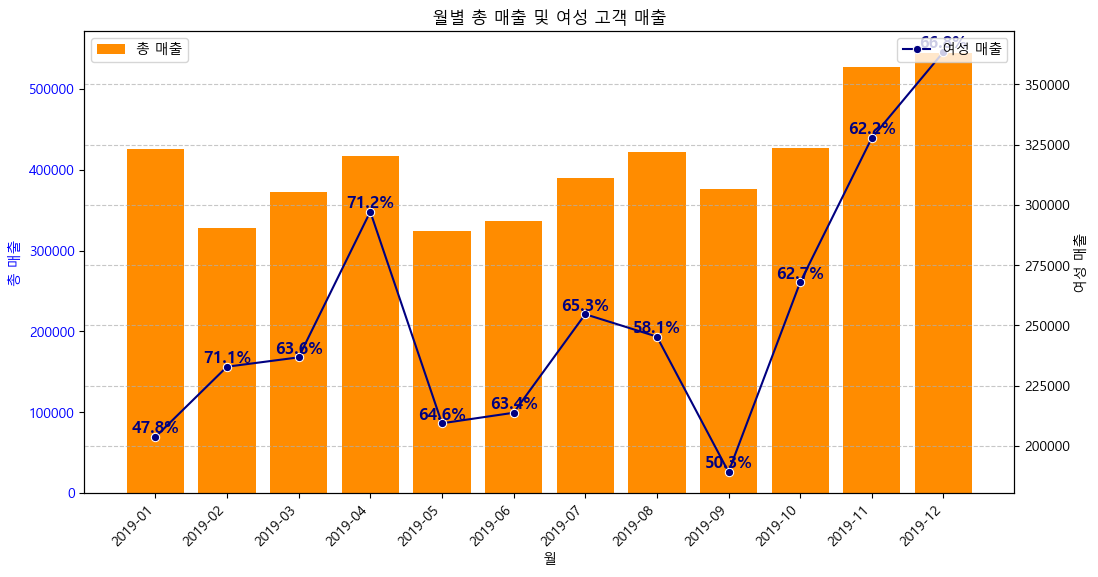

In [ ]:

# 날짜 형식 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 월별 총 매출 계산
df['거래월'] = df['거래날짜'].dt.to_period('M')

# 전체 매출 집계
monthly_sales = df.groupby('거래월')['총 매출'].sum().reset_index()

# 여성 고객 매출 집계
female_sales = df[df['성별'] == '여'].groupby('거래월')['총 매출'].sum().reset_index()

# 데이터 병합
monthly_sales = monthly_sales.merge(female_sales, on='거래월', how='left', suffixes=('', '_여성'))
monthly_sales['총 매출_여성'].fillna(0, inplace=True)

# 여성 고객 매출 비율 계산
monthly_sales['여성 매출 비율(%)'] = (monthly_sales['총 매출_여성'] / monthly_sales['총 매출']) * 100

# 데이터 타입 변환 (오류 방지)
monthly_sales['거래월'] = monthly_sales['거래월'].astype(str)  # Period → 문자열 변환
monthly_sales['여성 매출 비율(%)'] = monthly_sales['여성 매출 비율(%)'].astype(float)  # 숫자로 변환

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 총 매출 막대 그래프
bars = ax1.bar(monthly_sales['거래월'], monthly_sales['총 매출'], color='darkorange', label="총 매출")
ax1.set_ylabel("총 매출", color='b')
ax1.set_xlabel("월")
ax1.set_title("월별 총 매출 및 여성 고객 매출")
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(monthly_sales['거래월'], rotation=45, ha='right')

# 여성 매출 보조선 그래프 (총 매출과 동일한 축 사용)
ax2 = ax1.twinx()
sns.lineplot(data=monthly_sales, x='거래월', y='총 매출_여성', color='navy', marker='o', ax=ax2, label="여성 매출")
ax2.set_ylabel("여성 매출", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# 여성 매출 비율을 선 그래프 위에 표시
for i, txt in enumerate(monthly_sales['여성 매출 비율(%)']):
    ax2.text(i, monthly_sales['총 매출_여성'].iloc[i], f'{txt:.1f}%', 
             ha='center', va='bottom', fontsize=12, color='navy', fontweight='bold')

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 출력
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import pandas as pd

# 데이터의 마지막날 +1일을 기준으로 Recency 계산
last = df['거래날짜'].max() + pd.DateOffset(days=1)

# RFM 지표 계산
rfm_df = df.groupby('고객ID').agg({
    '거래날짜': lambda x: (last - x.max()).days,  # Recency (최신성)
    '거래ID': 'nunique',  # Frequency (구매 빈도)
    '총 매출': 'sum'  # Monetary (총 구매 금액)
}).reset_index()

# 컬럼명 변경
rfm_df.rename(columns={'거래날짜': 'Recency',
                        '거래ID': 'Frequency',
                        '총 매출': 'Monetary'
                       }, inplace=True)

# RFM 점수화 (1~5점)
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=5, labels=[5,4,3,2,1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], q=5, labels=[1,2,3,4,5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], q=5, labels=[1,2,3,4,5])

# 고객 세그먼트 정의
rfm_df['RFM_Segment'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# 최종 RFM 점수 (합산하여 최우수 고객 분석 가능)
rfm_df['RFM_Score'] = rfm_df[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

# 결과 출력
rfm_df

,고객ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,USER_0000,108,1,30.99,3,1,1,311,5
1,USER_0001,60,31,14121.36,4,5,5,455,14
2,USER_0002,74,8,1511.19,4,2,3,423,9
3,USER_0003,18,11,1429.47,5,3,3,533,11
4,USER_0004,108,13,1590.96,3,3,3,333,9
...,...,...,...,...,...,...,...,...,...
1463,USER_1463,271,3,550.84,1,1,2,112,4
1464,USER_1464,88,19,2485.73,4,4,3,443,11
1465,USER_1465,195,2,114.06,2,1,1,211,4
1466,USER_1466,70,1,298.00,4,1,1,411,6


<Axes: >

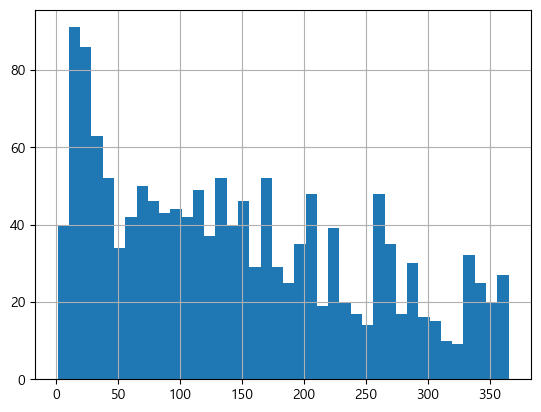

In [ ]:
rfm_df['Recency'].hist(bins=40)

<Axes: >

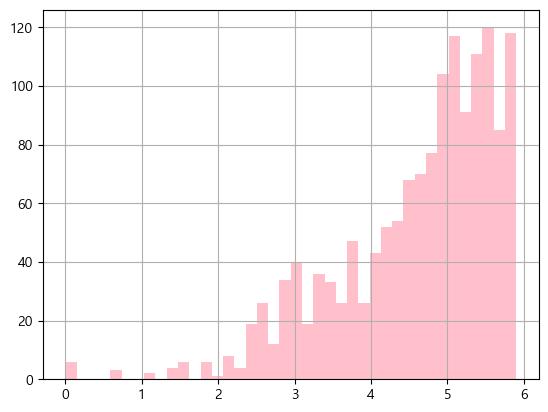

In [ ]:

rfm_df['log_recency'] = np.log(rfm_df['Recency'])
rfm_df['log_recency'].hist(bins=40, color='pink')


<Axes: >

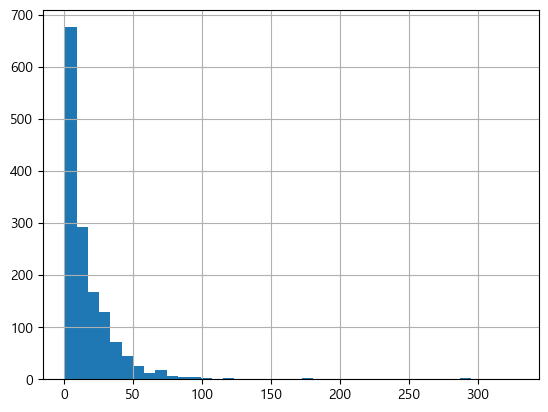

In [ ]:

rfm_df['Frequency'].hist(bins=40)

<Axes: >

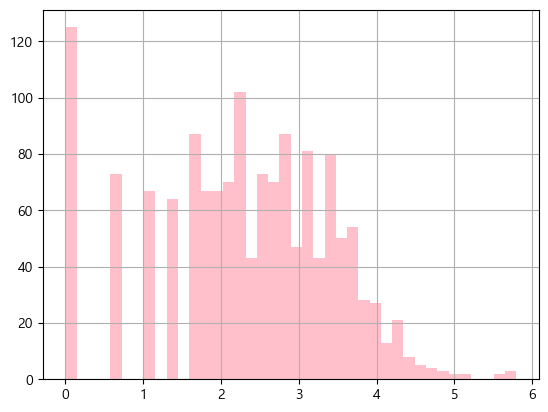

In [ ]:
rfm_df['log_frequency'] = np.log(rfm_df['Frequency'])
rfm_df['log_frequency'].hist(bins=40, color='pink')

<Axes: >

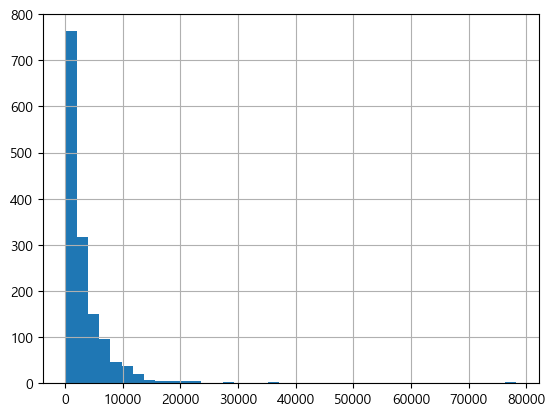

In [ ]:
rfm_df['Monetary'].hist(bins=40)

<Axes: >

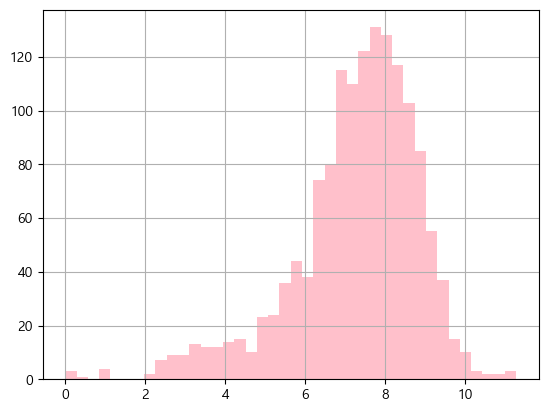

In [ ]:

rfm_df['log_monetary'] = np.log(rfm_df['Monetary'])
rfm_df['log_monetary'].hist(bins=40, color='pink')

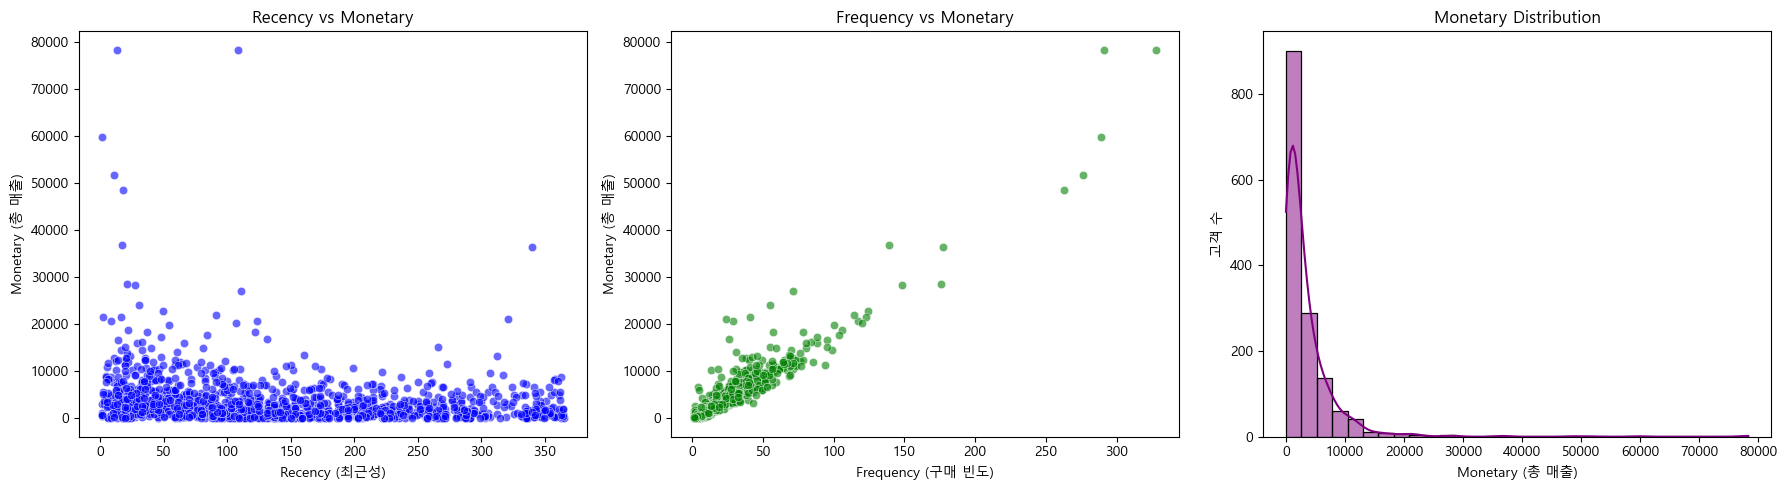

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency vs Monetary
sns.scatterplot(x=rfm_df['Recency'], y=rfm_df['Monetary'], ax=axes[0], color='blue', alpha=0.6)
axes[0].set_title("Recency vs Monetary")
axes[0].set_xlabel("Recency (최근성)")
axes[0].set_ylabel("Monetary (총 매출)")

# Frequency vs Monetary
sns.scatterplot(x=rfm_df['Frequency'], y=rfm_df['Monetary'], ax=axes[1], color='green', alpha=0.6)
axes[1].set_title("Frequency vs Monetary")
axes[1].set_xlabel("Frequency (구매 빈도)")
axes[1].set_ylabel("Monetary (총 매출)")

# Monetary 자체 분포 확인
sns.histplot(rfm_df['Monetary'], bins=30, kde=True, ax=axes[2], color='purple')
axes[2].set_title("Monetary Distribution")
axes[2].set_xlabel("Monetary (총 매출)")
axes[2].set_ylabel("고객 수")

plt.tight_layout()
plt.show()
